In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import texttable
import scipy

In [6]:
import scrape_sbr

In [8]:
# we must offer our prayers to RNGsus
rng = np.random.default_rng(2718)
np.random.seed(2718)

# Don't Be a Sucker
Casey Durfee

## Intro
This started because I got tired of people talking about their gambling losses online. Why talk about how you lost money doing something that you should have known would lose you money? Every season there are more ads and more talk about gambling, and it's definitely making sports worse. 

It contributes to this environment where the meta -- the stats, the highlights, the talking points -- are more important than the competition itself, and that's sad. Athletes shouldn't be treated like malfunctioning random number generators.

So I was curious about how it worked. I am not a gambling expert. Before this project, my exposure to sports gambling was mainly being annoyed at the constant advertising.

I'm trying to convey a little common sense and intuition about how this stuff works. There are a whole lot of thought experiments, dubious philosophical insights, and silly jokes.

I've tried to avoid too much formal stuff, instead running little simulations to explain ideas. I hope it's fairly approachable, but not too much. Because gambling is all math after a couple of bets. So maybe I can help people transfer their irrational math anxiety into rational betting anxiety. Math can be your pal. The casinos can't.

## The Disclaimer
Gambling can be addictive. Anyone can become an addict. Addiction is not a question of intelligence or virtue. 

Maybe you're saying, "I don't know I'm going to lose". True, but you're also not going to bet one time, especially if you win. What happens over the long term? Betting is about statistics, not feelings, and the sportsbooks are better at that than you are, especially in the heat of the moment.

Want to try betting without the losses? Just do it on paper. What's the downside? People play board games with fake money and trade stocks with fake money and still have fun. OK, a lot of family Monopoly games end in tears, but nobody's broke in real life at the end.

As you'll see, the bets that sportsbooks push on naive gamblers are guaranteed losers in the long run, regardless of skill. Even if you know more about sports than the average bettor, you're still probably going to lose money. 

I would guess maybe 1% of bettors make money long term. The estimate I see online is 3% are successful, but that seems way too high. I would guess it's more like an MLM at less than 1% success rate. It's definitely not a 50/50 split between winners and losers. I wonder if that naive assumption drives some people to bet.

### Free Life Advice
*Definition of Insanity (Casey's Version)*:

> If you're doing what everybody else does, you'll get the results everybody else does. 

Do with that what you will. Maybe get that as a back tattoo. Everybody else isn't doing that!

### Games of skill and chance
Sports gambling was legalized on the premise that it's a game of skill. People were told it's not like "real gambling" where the winner is randomly decided. Of course, the lottery isn't a game of skill and that's legal almost everywhere.

It's supposedly about who knows more about sports. And that's plausible. Sports-knowing is a sort of skill. Making predictions about the future that are better than random is a skill, too. Maybe there's some sort of American civic virtue in the combination of the two.

Of course, "Grifting the Rubes" is also an American civic virtue, of a sort.

![never give a sucker an even break movie poster, from wikipedia](img/sucker.jpg)

"You wanna bet on it" is a primal reaction to somebody saying something you think is wrong about sports. I get it. 

I remember back in 2016, getting in a disagreement with somebody online over whether Andre Drummond or Nikola Jokic would be the better NBA player in the long run. He didn't want to make a bet on it, unfortunately. I think Drummond was an All-Star that year and Jokic was still a nobody. He would often get winded after about 5 minutes and commit a silly foul so he could get subbed out. I should've gotten pretty good odds on it. 

### Dutch Books
"You wanna bet on it" is also the key to an idea in the area where philosophy and economics meet called Decision Theory [1].  Both economists and philosophers have a keen professional interest in what is or isn't rational behavior. It makes things way messier if you have to account for people who behave in ways that don't follow logical patterns. Economists need perfectly rational human beings even more than they need perfectly spherical cows. 

I've seen some awfully fat cows, but I've never seen a perfectly logical human.

How do you determine whether an individual made the right choice for themselves? Sometimes, it's a subjective judgement based on what the individual values. But, the theory goes, if betting according to a person's stated beliefs would be guaranteed to lose them money, their beliefs are irrational. Not because you or I think they're irrational, but because they violate the rules of probability theory and logic, and lead to these guaranteed losing bets. Look, I'm not saying you're crazy, Abraham De Moivre is!

This is called the Dutch Book Theorem. "Making a book" means a situation where you are guaranteed to win money no matter the outcome, and a Dutch Book is specifically when you'll make the exact same amount either way. A bookie with an equal amount of money on both sides of a bet has made a Dutch Book. They're getting paid the same amount regardless of who wins.

It's basically a rigorous, formal definition of a sucker: someone who is guaranteed to lose money because of their garbage beliefs.

### Game Recognize Game Theory
The Dutch Book Theorem was created by a guy named [Frank P. Ramsey](https://en.wikipedia.org/wiki/Frank_Ramsey_(mathematician)). He made major contributions to philosophy, economics, and math by the age of 26. He died in 1930 after swimming in a polluted river and contracting a disease. 

He's basically the Len Bias of math. It hurts to just imagine if he had lived another 10 years and got to play in the Computer Science era. Can you imagine him and Turing on the floor together? And [Russell](https://en.wikipedia.org/wiki/Bertrand_Russell) playing Center?  Good luck [halting](https://en.wikipedia.org/wiki/Halting_problem) that. Dude would have gotten 40 a night. 

No way [Nash](https://en.wikipedia.org/wiki/John_Forbes_Nash_Jr.) is  [winning](https://en.wikipedia.org/wiki/Abel_Prize) two [MVP's](https://en.wikipedia.org/wiki/Nobel_Memorial_Prize_in_Economic_Sciences) if Ramsey didn't die so young.

![the homie, fp ramsey](img/homie.jpg)

This won't be his only appearance.


### The pleasure is to play, makes no difference what you say
Can you really do a Dutch Book argument against someone betting Nephew Doug's can't miss 4 team parlay? Aren't they getting pleasure out of it, regardless of outcome? 

I accept you can't really say it has a negative expected value for the individual. If a gambler's goal is to lose money in an entertaining fashion rather than make money, then maybe they aren't irrational for betting the Nephew Doug way. 

But there's a dark side to this. People aren't paying thousands of dollars to buy picks because they want to lose money in a more fun way. They do it because they think it will make them money in the long run.

Here's a particularly egregious promise from one pick seller (who charges $1200 a year for his picks):

> " If you follow ______'s advice by playing his selections you are going to find yourself making a decent second income from gambling. If you are working full-time, have a family, or have other interests, then you can't possibly put in the time required to win at sports-betting. Don't let this opportunity pass you by, hop on board with ___ and start cashing now!" [13]

That's borderline criminal.

Is a teaser that's almost guaranteed to lose money more entertaining than a bunch of regular bets? I don't know how you value that. Seems like 4 little thrills, each with a 50% of winning would be better than 1 big thrill with a 6.25% of winning. I only know that gamblers who bet regularly are supposedly doing it to make money.

I don't know that betting small amounts every once in a while is all that irrational. You can do that knowing you'll probably lose money, and probably brings some extra fun to a game you'd enjoy anyway. If somebody's betting habitually with negative expected value despite saying they want to make money, I think that's a clear Dutch Book situation. 

By losing all the time, these people are also funding the sportsbooks making sports crappier for the rest of us. I'm sure a lot of them loved sports before they got co-opted by an addictive habit. So, hate the game, not the player, I guess.

### Guaranteed Losers

Some types of bets will lose money over the long term, even for skilled bettor. These are the ones that get pushed the hardest: parlays, prop bets, teasers, in-game betting.

If nothine else, I hope you will understand why these types of bets are extra bad. Nobody actually trying to make money would take them. They are games of chance, not games of skill, and have negative expected value, often worse than playing craps or baccarat in a casino. 

They may as well be rigged carnival games. If you take the wrong types of bets, your skill or knowledge doesn't matter. They are losers for everybody who can't see the future. If you really can see the future, and you're using those magical powers to decide who's going to win a random Hornets-Pacers game, I don't know what to tell you.


### The spread and other gambling nonsense
I will be discussing betting on point spreads on the NBA. The idea behind a point spread is that while both teams might not be equally likely to win the game, there's some difference in score, some handicap that could be given to the better team so that both outcomes are equally likely. 

If you're playing "HORSE" against a child, you might offer to start at "HOR" to make the contest more interesting. I mean, you're still hustling the kid, because little Billy has no way of knowing your jumper's [wet](https://www.espn.com/espnw/news/story/_/id/6608288/nba-playoffs-finals-word-nba-slang), but at least it's a contest on paper.

Say a really good NBA team is playing a really bad one. The really good team might win 90% of the time, which isn't interesting to bet for most people. But they might beat the other team by over 10 points 50% of the time, though. So a fair point spread for that game would be -10. If the favorites win by more than 10, the favorite wins. if they win by less than 10 or lose outright, the underdog side wins. 

Both sides of the bet are more interesting if it's a 50/50 thing. The math is nicer, too!

"Handicapping" is estimating the point spread, and sports bettors are really betting on whether the handicapper's estimate of the final point differential is too high or too low, rather than betting for a specific team. 

There are many other ways of betting on sports besides the spread, but it's probably the least bad option, as we shall see, and the math is the simplest to understand, which means the bookie has less of an inherent edge.

"Units" are a way to talk about gains and losses in a way that isn't tied to the amount of money you started out with or the bet size you take.

I will try to avoid other gambling lingo, which isn't necessary and really only serves to make betting seem like a cool activity that you can get good at by learning a bunch of gambling lore. It's not. It's all bullshit, and probably makes you worse.

### The Vig
For the type of bets I'm discussing here, you have to risk slightly more than you win. That difference is called the vig and is the way the sportsbook makes money. Sometimes it is called "the juice".

That means you have to win more often than you lose in order to just break even. [Your Uncle Juice](https://www.youtube.com/watch?v=726Ujz_KOHE) is not, in fact, a good man. How much more? 

Let's do the math. Let "WP" be winning percentage and "LP" be losing percentage. Those have to add up to 100. Let's find the break-even point where the winning percentage is high enough to cancel out the cost of the vig:

$WP - (VIG * LP) > 0$

We also know that

$WP + LP = 100$

so with a little algebra:

$LP < 100/(1+VIG)$

and

$WP > 100 - (100/(1+VIG))$

A standard bet on the spread has a vig of "-110" which means you have to risk 1.1x more than you win. If the "-110" looks funny to you, America uses different notation for betting than other countries. Luckily, the laws of probability are true everywhere, and my grandfathers didn't fight in WWII just for me to have to learn some other way of writing the odds.

At -110, you have to win at least 52.4% of the time just to break even.

In [8]:
vig = 1.1

100 - (100/(1+vig))

52.38095238095238

If there is the same amount of money on each side of the bet and the vig is -110, the sportsbook is going to get 5% of the total amount bet no matter who wins or loses. Pretty sweet business, right? 153,000,000 was bet on the Super Bowl in Las Vegas in 2023 [1], netting a profit for the casinos of 7.6 Million dollars at full vig.

In [9]:
f"{153000000 * .05:,}"

'7,650,000.0'

A lot of Super Bowl betting is on prop bets, which have a higher vig, so the real number was probably higher than that.

### Various Vigs

Even though they already have a license to print money, sportsbooks have come up with a whole slew of different ways to get people to pay more than the 5% per bet of a standard vig. If you had common sense, you'd assume that the types of bets most heavily promoted have the highest profit margins for the sportsbooks and are the worst for you. That's just capitalism, baby! But, if you had common sense, you probably wouldn't be betting in the first place. So here we are.

Prop bets are where you bet on an individual player's performance, such as whether player X will score more or less than 20 points. These bets usually have a vig of -115 rather than -110. They also have a quirk that I will discuss later on.

In-game betting is the worst, both for people who bet and people who just want to watch the game. It's impossible to avoid advertisements for it. 

Common sense would say anything that aggressively marketed must be insanely profitable to cover the advertising costs. And you'd be right. The vig on those bets is -120, twice a standard bet, which is crazy.

Think about the vig a minute. Make sure these things are clear in your mind.

1) the size of the vig will affect how much advantage or disadvantage the player has versus the house. It can turn a winner into a loser.
1) If there's any vig at all, you have to win more than 50% of the time to not go broke in the long run. 
2) Even a tiny vig will eat up your bankroll if you win 50% of your bets. that money isn't lost on being wrong, it's lost on overhead.
3) If a vig is high enough, there's no possible way to make money on betting in the long run, no matter how good you are. 
4) If you don't know the vig, you can't say you took the bet with a rational expectation of winning money. how would you know whether making money is even possible?
 
Here's a plot of break-even winning percentage versus the vig.

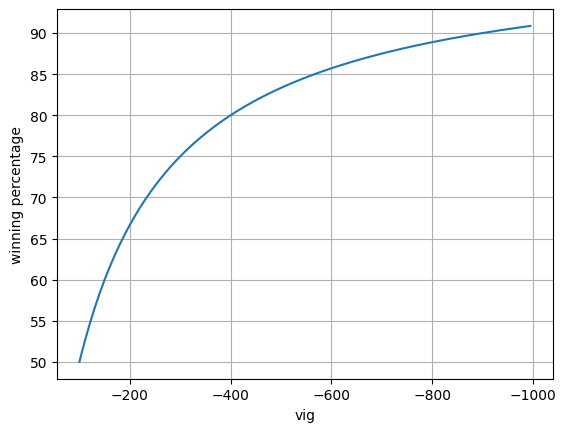

In [10]:
vig_range = np.arange(1.0, 10, .05)

break_even_point = 100 - (100/(1+vig_range))

vig_label = -100 * vig_range

plt.plot(vig_label, break_even_point)
plt.gca().invert_xaxis()
plt.ylabel("winning percentage")
plt.xlabel("vig")
plt.grid()

Here's the interesting part of the graph for the bets I'll be talking about:

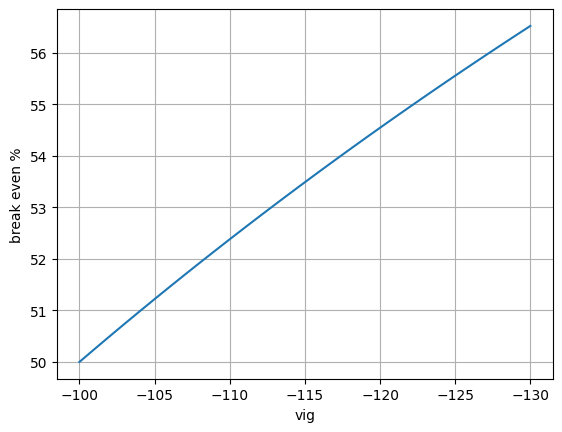

In [11]:
vig_range = np.arange(1.00, 1.3, .01)

break_even_point = 100 - (100/(1+vig_range))

vig_label = -100 * vig_range

plt.plot(vig_label, break_even_point)
plt.gca().invert_xaxis()

plt.ylabel("break even %")
plt.xlabel("vig")
plt.grid()

In [12]:
table_vig = np.arange(1, 1.5, .05)
table_wp = 100 - (100/(1+table_vig))

table_vig = table_vig * -100

table = texttable.Texttable()
table.set_cols_dtype(['i','f'])

data_list = list(zip(table_vig, table_wp))

data_list.insert(0, ["Vig", "Win Pct"])

table.add_rows(data_list)
print(table.draw())

+------+---------+
| Vig  | Win Pct |
+======+=========+
| -100 | 50.000  |
+------+---------+
| -105 | 51.220  |
+------+---------+
| -110 | 52.381  |
+------+---------+
| -115 | 53.488  |
+------+---------+
| -120 | 54.545  |
+------+---------+
| -125 | 55.556  |
+------+---------+
| -130 | 56.522  |
+------+---------+
| -135 | 57.447  |
+------+---------+
| -140 | 58.333  |
+------+---------+
| -145 | 59.184  |
+------+---------+


## If you have to ask the price, it's probably more than you can afford.

Predictions are hard, especially about the future. Is it reasonable to think someone could do better than the minimum 55% to break even on in-game betting? I don't know how to estimate that. But if we assume that the vast majority of bettors can't even win 52.4% of the time on the spread, [TODO Fix this sentence] then it seems crazy that a lot of people are making money on in-game bets. Especially since bets made during the game are more likely to be emotionally charged than a bet placed the morning before the game. And that's just to break even. I think anyone who was that good would know enough to just take normal bets.

There's never a good reason to pay more vig without getting something in return. A rational bettor would always pay the lowest vig possible, and not take bets if the vig is high enough to make the bet have a negative expected value. 

### The Gambling Cartel
Note how the major players in legal gambling don't compete on price at all. Why wouldn't DraftKings or FanDuel offer -109 vig instead of -110 to attract more customers? Shouldn't the explosion in legal gambling have driven the price of taking a bet down?

It's sort of understandable why brick and mortar casinos would charge -110. They've got fancy buildings to pay for. Showgirls, Elvis impersonators, cocktail shrimp... I'm sure it adds up quick. And until recently, Vegas had a virtual monopoly on legal gambling, so no (legal) online competition.

DraftKings and FanDuel are online only. Why do they charge as much as in-person casinos? It's as if online stock brokerages such as E-Trade or Ameritrade got big but they still charged as much as full service stock brokers did back in the 1970's.  It's hard for me to see how DraftKings and FanDuel aren't acting as a cartel when there's no price competition on the vig and they offer the same exact betting lines.

Informed consent is important. If the sportsbooks aren't telling customers the expected value of the bet and what that means, people can't make rational choices because they don't know what the real cost of placing a bet is. Even if you think gambling should be legal, I think you should care about that.

## Silly stuff people do
Sportsbooks have innovated many different ways to offer people crappier bets and hide the true cost. I already covered prop bets and in-game betting, but there are also teasers, parlays, money lines, pleasers, and buying points. And they let you combine them, for instance you can take a parlay of prop bets and money lines if you really want to do three stupid things at once.

###  Money Lines
[TODO: trim this down, it's not interesting enough to be this long. also, introduce the concept of the money line to spread conversion chart.]

What if you don't want to bet the spread, you just want to bet on who wins the game outright? If you like the favorite, you risk much more than you win, and if you like the underdog, you win much more than you risk.

At a high level, there has to be a way to convert between money lines and point spreads based on what real world data says. Based on real data, a -10 favorite wins ___ % of the time, which equates to a ___ money line, right? Without needing to know anything about statistics, you can assume there's a way to convert back and forth from a spread to a money line.

Now, who do you think is better at doing that conversion, you or the sportsbooks? And why wouldn't they use that knowledge to make more profit for themselves?  Perhaps money lines feel better. But the casinos love it when it's their math versus your feelings.

Money lines probably aren't that bad of a deal, except on extreme favorites or extreme underdogs, but they do make the math harder. The vig isn't obvious on money lines, and they have different probabilities. A bunch of bets against the spread or point totals all have a roughly 50/50 shot of winning. So you can add those together and analyze them cleanly. Money lines have different odds of winning, which makes the math hard if you're trying to assess performance. [14]

So the win-loss record doesn't mean that much if you're taking a lot of money lines. And I think that has a psychological effect. You could easily go 4-1 on money lines betting the heavy favorites and lose money. Or, worse yet, think that 4-1 record means you have skill. There would have to be a lot of value on money lines to justify making the math and the psychology a mess, in my opinion.


### Parlays
"Parlay" means "to talk" in French, so it's no surprise dudes always want to talk about them online.

The idea behind a parlay is that you can bet on multiple things at once and if they all win, you make a nice profit, otherwise you lose. 

Why would they be offering this bet if it was good for you?  

Your profits are always going to be lower than if you just took the individual bets, assuming the bets are uncorrelated with each other.They're just a tax on not knowing what expected value is, or not caring about it: https://en.wikipedia.org/wiki/Expected_value. 

Expected value is  the weighted average of all the possible outcomes. You've already seen that with the vig when I calculated the break-even point -- how often do you have to win to break even on average?

The standard payout on a 4 team parlay is 10:1 [3]. What is the expected value of such a play? is it higher or lower than taking the individual bets?

It's easy to grind the math on this one, but maybe a simulation makes it more convincing. we'll do a bunch of bets and see whether the parlay or the individual bets are better. I can't say "make us more money" because both types of bets are guaranteed losers without some sort of edge. 

This is such a bad bet on the surface that to understand it, I have to give you a little taste of parlay culture first.

### Nephew Doug
Say you have 4 "can't miss" bets you want to make. You just got into betting on sports, so as a newbie you're trying to learn from experts by listening to podcasts. You've listened to Nephew Doug's podcast, and wrote down his Locks of the Week. You're ready to enter them into your betting app, which has been hand-optimized to be as much of a dopamine and money sink as possible.

Because you listen every week, you know Nephew Doug has been burdened by the Gods with the gift of prophecy. He's like a modern day Cassandra, only it's about how the Cowboys are always going to suck. 

Now, the Gods like a little competition. The Olympics were invented as a religious ceremony in their honor, after all. But they're not above making a call from on high to nudge the result a little bit. Zeus is definitely a Chiefs fan.

So you believe ahead of time Nephew Doug's picks will win 60% of the time. Which way of betting these picks will bring you the most money in the long run?

1) "throw 'em all in a 4 team parlay" like Doug and his buddy Jorts Guy always do
2) randomly choose 3 of Nephew Doug's picks and bet them individually. Don't do anything with the 4th one.

Maybe option 2 seems insane to you. But let's game it out.

You listen to Nephew Doug, but I don't. My assumption would be this guy sucks at his picks and only wins 50% of the time, or close to it. Let's see how that works out.

In [13]:
def do_some_bets(skill = .5, throw_one_out=False, random_fourth_bet=False):
    BETS  = 100000
    VIG = 1.1

    straight_profit_loss = 0
    parlay_profit_loss = 0


    for b in range(BETS):    
        bet1 = rng.random() < skill
        bet2 = rng.random() < skill
        bet3 = rng.random() < skill
        bet4 = rng.random() < skill

        if bet1 and bet2 and bet3 and bet4:
            parlay_profit_loss = parlay_profit_loss + 1000 # 10x payout
        else:
            parlay_profit_loss = parlay_profit_loss - 100

        for bet in [bet1, bet2, bet3]:
            if bet:
                straight_profit_loss = straight_profit_loss + 100
            else:
                straight_profit_loss = straight_profit_loss - (VIG * 100)

        if not random_fourth_bet:
            if not throw_one_out:
                if bet4:
                    straight_profit_loss = straight_profit_loss + 100
                else:
                    straight_profit_loss = straight_profit_loss - (VIG * 100)
        else:
            # what if the 4th bet is taken by flipping a coin?
            alt_bet4 = rng.random() < .5
            if alt_bet4:
                straight_profit_loss = straight_profit_loss + 100
            else:
                straight_profit_loss = straight_profit_loss - (VIG * 100)

    ratio = parlay_profit_loss/straight_profit_loss
    print(f"parlay: {parlay_profit_loss:,}, straight: {straight_profit_loss:,}, ratio: {ratio}")
    return ratio

result = do_some_bets()


parlay: -3,040,300, straight: -2,003,360.0000000002, ratio: 1.517600431275457


At 50% win rate, if you take enough of these four team parlays, you're going to lose around 1.5x more taking the parlay than taking the individual bets. Which is what you'd expect given the payout is 10:1 instead of a fair $1/(2*2*2*2) = 15:1$.

What if Nephew Doug truly has been partially blessed by the Gods, and can beat the lines 60% of the time? Now you're turning a profit either way, but maybe parlays offer a better return if you're that skilled? 

In [14]:
ratio = do_some_bets(skill=.6)
1/ratio

parlay: 4,217,500, straight: 6,335,110.0, ratio: 0.6657342966420473


1.5021007705986957

Nope, if you're ridiculously good at betting, you'd make around 1.5x profit taking the individual bets rather than doing the 4 team parlay. 

What if you only take 3 individual bets and don't bet the fourth one, as I originally proposed? At 60% win rate, this is irrational. You're throwing away profit in the long run and betraying Nephew Doug. You may also be angering the gods with your hubris.

Maybe the parlay would make more money in that case?

In [15]:
ratio = do_some_bets(skill=.6, throw_one_out=True)
1/ratio

parlay: 4,384,700, straight: 4,885,680.0, ratio: 0.8974595143357731


1.1142563915433212

No! You would still make 10% or so more by taking the individual bets and throwing out one.

There is a win rate where parlays would make you more money than the straight bets. If we win 100% of the time, the parlay is definitely a better deal. 10x profits taking the parlay versus 4x taking the original bets. 

it's somewhere between 60 and 100%. 60% is already much higher than anybody can reasonably achieve betting on sports, a thing played by humans (unreliable, to put it mildly) in the future (also notoriously unreliable).

OK, final thing to try. Instead of taking the fourth bet, or throwing it out, we choose the 4th one by flipping a coin. This bet has a negative expected value so maybe finally the parlay will win. 

It's still basically a tie.

In [16]:
ratio = do_some_bets(skill=.6, random_fourth_bet=True)

parlay: 4,249,400, straight: 4,339,270.0, ratio: 0.9792891431047158


What if Doug is not actually blessed by the gods, but is savvy and knows a lot about sports? 54.8% is a reasonable figure. You could make money at that level, which only 3% of bettors do.

In [17]:
ratio = do_some_bets(skill=.548, throw_one_out=True)

parlay: 51,800, straight: 1,584,480.0, ratio: 0.032692113500959304


The parlays make nothing. The straight bets make 1.5 Million dollars, *even in this idiotic scenario where we throw one bet in four out*.

If a bet has negative expected value, it's always better for you not to take it. You should really throw out all four picks in that case. Take a zero team parlay. Go get yourself a nice bagel instead of turning your account balance into one. My lox of the week are way better than Doug's.

### What is the implied vig?

We can figure out the winning percentage required to break even betting parlays, and work backwards from that to get the implied vig.

The payout is 10:1, so we need all four to be winners 1 time in 11 to break even. The one win covers the 10 losses.

$ winRate^{4} > 1/11$

$ 4 * log(winRate) > log(1/11)$

$ winRate > e^{log(1/11)/4}$

In [18]:
np.exp(np.log(1/11)/4)

np.float64(0.5491004867761125)

You have to win each leg 54.9% of the time just to break even on the parlays rather than the break even point 52.4% on the original bets. Since being bad means being right 50% of the time, 54.9% is more than twice as difficult as 52.4%.

Based on a money line to spread conversion chart [15], that's the equivalent of giving up around 2-3 points on the line. Would you consider someone a savvy gambler if they did that? "No, I don't want those points. Please give me a worse line than everyone else, so I can lose and then go complain about it."

When it comes to betting gurus, years of experience doesn't matter if they never learn anything. It mostly seems to add up to a lot of experience trying to argue that the Universe got the outcome of that Wizards-Hornets game wrong, and finding patterns in random noise.

### parlay vous

I'm trying to avoid getting too mathy, but this is how probability works. It shouldn't really be surprising. Why would combining two unrelated bets be better for you? Even if you take slightly correlated bets, it's going to be hard to go from 1/16 (the natural odds of winning all four, if there's no correlation between the outcomes) to 1/11 (the break even point for a parlay.)  

"But the guy on the podcast I listen to has been "killing it" on parlays this year", I can hear you saying. As we saw, if they're really making money overall on parlays, they'd be making 1.5x profits taking the individual bets, so they're not that smart. And I'd love to see their betting records. All of them, not just the ones they brag about after they win. I doubt any of these guys are making money over long stretches of time off of gambling.

Gambling ads, sure. Everybody's taking gambling money right now, regardless of how it will hurt their brand, their audience, and the sport long term. Clearly there's a lot of money in talking about it. 

Where's all that ad money coming from? Isn't it obvious why they're pushing teasers and parlays and "profit boosters"? I love that last one. It's like saying Idi Amin served mankind. [5]

Why would they care about boosting YOUR profits? Unlike gamblers, they don't make negative expected value plays due to emotional reasons or lack of math skills.

### Buying/Selling points

Say a team is favored by 10 against the spread, but you think they will only win by 7. You can buy points to get them at -7 instead of -10. 

This is special service the sportsbook offers where there is some math involved. Anytime you're demanding special treatment, you're going to have to pay more. The money line is essentially buying/selling points as well. But a lot of people bet the money line, so I'd expect that's not as bad of a value. 

The book is definitely taking more of a risk here, so the added cost is somewhat justified. They want equal money on whatever line people take so they make money no matter what. If the real line is +10/-10 and somebody places a huge bet at -7, they have to manage that risk somehow even though they can't get an equal amount of action on +7. The added vig could be seen as a form of insurance payment for the bookmaker. 

 They don't incur that risk with money lines, because they have a lot of people on both sides of them.

### Teasers

More silly podcast nonsense. This is basically just a combination of a parlay and buying/selling points. Two bad ideas rolled into one! Again, why would anyone making money long term do teasers? They're complicated, so I guess it feels like you're doing something sophisticated, but you can't add value by taking them unless the different legs of the teaser were somehow correlated with each other. 

Do people who take them feel like when they lose, it's because they just haven't learned teasers yet? The game is rigged. It's not a skill issue.

Scoring in American football goes in units of 2, 3, 6, 7, 8. That means some point differentials will be more common than others. It should be more common for a game to end with a difference of 3 points than 4 points.

So "getting a number" by moving a line across some common point differential could be a thing. But why wouldn't the sportsbooks know that, and properly price it in?

There are no "magic numbers" in NBA basketball. So I don't think there's an additional skill that can be learned to make them more profitable than straight bets. Even with NFL, without evidence, it's dubious to me that bettors are making more money on teasers.

## A shady line

The line is a prediction about an outcome of a game. the difference between the predicted and actual value is called the error.  The error should be unbiased and randomly distributed. In practical terms, favorites and underdogs should win exactly 50% of the time over a long enough time span. 

Turns out, maybe they don't?

I grabbed NBA odds data for this season from sportsbookreview.com [2]. Some of the games are missing scores, but among the ones that have them, underdogs are 189-172 against the spread (as of January 5th 2025). That's a 52.4% winning percentage. (does that number sound familiar?) 

At full vig, that means you would break even betting every underdog, lose 34 units betting on every favorite, and lose 18 units if your picks are right 50% of the time.

This isn't statistically significant, but it is curious. Especially since it's right at that magic number that prevents arbitrage (making a profit by always taking the underdog.)

In [19]:
from scipy.stats import norm
from scipy.stats import chisquare

def win_loss_report(wins, losses, vig=1.1):
    win_pct = wins / (wins+losses)
    expected_wins = (wins + losses) /2
    std = np.sqrt(wins + losses)/2
    z_score = (wins-expected_wins) / std
    p_value = norm.cdf(z_score)
    profit_pct = 100 * (win_pct - (vig * (1-win_pct)))

    print(f"record:   {wins} - {losses}")

    print(f"full vig (-110) units\t: { round(wins - (1.1*losses),2) }")
    print(f"reduced vig (-106) units: { round(wins - (1.06 * losses),2) }")
    if vig != 1.1:
        print(f"actual units: {wins - (vig*losses)}")

    print(f"win pct: {round(100 *win_pct,2)}%, expected wins: {expected_wins} , excess: {wins - expected_wins}, profit %: {round(profit_pct,2)}")
    print(f"z test: {z_score}, std: {std} , p: {1-p_value}")


win_loss_report(189,172)

record:   189 - 172
full vig (-110) units	: -0.2
reduced vig (-106) units: 6.68
win pct: 52.35%, expected wins: 180.5 , excess: 8.5, profit %: -0.06
z test: 0.8947368421052632, std: 9.5 , p: 0.18546388963734017


Sportsbooks are good at estimating the value of points, because they offer the ability for customers to buy and sell them. So they could produce an unbiased line, then add a little "shade" towards the underdog at the end (or just don't move the line despite having more money on one side). But not too much shade to make blindly taking underdogs profitable.

Why would they want to do that? Say that 70% of people take the favorite and 30% take the underdog. How much more valuable is that? The math is obvious, but let's do it anyway.

People who pick the favorites lose \$10 per \$100 bet instead of the usual 5.

In [24]:
# losing 52.4% of the time instead of 50%
lose_rate = .524
win_rate = 1-.524
ev_favorites = (win_rate * 100) - (lose_rate * 110)

ev_favorites

-10.040000000000006

So the bookie is making twice as much on favorites as they would with a fair line.

What about underdogs? If dogs win 52.4% of the time, the casino will just break even on those bets.

In [25]:
win_rate = .524
lose_rate = 1-.524
ev_dogs = (win_rate * 100) - (lose_rate * 110)

ev_dogs

0.04000000000000625

If they were taking equal money on both sides, it's a wash, but if 70% of the bets are on favorites, the casino will make \$7 for every \$100 bet instead of an honest \$5:

In [22]:
(.7 * ev_favorites) + (.3 * ev_dogs)

-7.016000000000002

We can convert that back to the effective vig. assume a 50% winning percentage (versus the fair line) and solve for the vig.


$winPct - ((1-winPct) * vig) = -7$

$ 50 - (50 * vig) = -7$

$ vig = 57/50 = 1.14$

So by shading the lines, a bookmaker could effectively get a -114 vig instead of a -110. That's pretty significant. Even though people betting on underdogs are effectively not paying the vig, there are fewer of them than people betting on the favorites and paying extra juice. So if a sportsbook could do this, it should. There's nothing stopping them, so maybe you should assume they are. They have to offer bets on both sides of a line, but they don't have to make the lines fair.

More on this later. Everyone who's ever caught a fish knows you have to set the hook. I think this will do it.

## Math is Money and Money is Math

The sportsbooks change the lines over time. On paper, this is so they can attract an equal amount of action on both sides. But usually, one side ends up with more money on it than the other. Over time, those should even out, but they don't have to if the heavier action is usually on the side that loses.

sportsbookreview provides what percent of the money was placed on each side of the bet. It's not clear what sportsbook they're getting the data from. They don't have it for all games. This data is available before the game starts, though, so it would be possible to bet based on it.

What if we used that data and always took the less popular side? If over 50% of the money is on the away team according to SBR, we will bet the home team, and vice versa. We'll ignore games where the money is 50/50.

These numbers are from October 22, 2024 (start of the regular season) thru January 5, 2025.

In [23]:
def test_thresh(lower=50, upper=50):

    ftp = scrape_sbr.fade_the_public(lower_thresh=lower, upper_thresh=upper)

    ct = pd.crosstab(ftp.fade, ftp.winner_ats)
    win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])
    print("\n")
    print(ct)
    return ftp

_trash = test_thresh()

AttributeError: module 'scrape_sbr' has no attribute 'fade_the_public'

So this very basic strategy makes money. 27.2 units at reduced juice isn't bad. but 4% profit is pretty thin gruel. Even if this was a real trend, 54.3% win rate is low enough that there's a good chance of losing money, even after hundreds of bets. I'll show that in the section on random walks.

The system is going 117-109 when taking HOME (note, the wins and losses are flipped in the bottom row.) Those will lose money with the full vig figured in.

Taking just the AWAY teams goes 137-105. Profits on reduced juice went down by filtering the HOME bets out.

In [313]:
win_loss_report(137,105)

record:   137 - 105
full vig units: 21.5
reduced juice units: 25.7
win pct: 56.61%, expected wins: 121.0 , excess: 16.0, profit %: 8.88
z test: 2.05703790890632, std: 7.7781745930520225 , p: 0.01984128975085442


That's a pretty easy rule to explain given the predictive power. "Bet the away team if they have less than 50% of the money on sportsbookreview."

I'm assuming the home team is usually a worse value, so maybe we should be more choosy about when we take the home bet. Let's raise the threshold so that the away team has to get over 60% of the money for us to take the home team. Full disclosure: I just messed around with the upper threshold till I found the optimal value. Arbitrary decisions like that can lead to overfitting.

In [314]:
bets_taken = test_thresh(upper=60)

record:   184 - 143
full vig units: 26.7
reduced juice units: 32.42
win pct: 56.27%, expected wins: 163.5 , excess: 20.5, profit %: 8.17
z test: 2.267305180798257, std: 9.041570660012562 , p: 0.011685794603592425


winner_ats  AWAY  HOME
fade                  
AWAY         137   105
HOME          38    47


27 units and a 56% winning percentage is quite something. 

The record on bets where we predict 'HOME' isn't good as the AWAY ones, though both types are making money now.

In [ ]:
win_loss_report(137,105)
print("=" * 40)
win_loss_report(47, 38)

I came up with one other twist. It's a pretty good one!

In [318]:
superfade = scrape_sbr.superfade(play_dirty="yes")
ct = pd.crosstab(superfade.fade, superfade.winner_ats)
win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])

ct

record:   132 - 85
full vig (-110) units	: 38.5
reduced vig (-106) units: 41.9
win pct: 60.83%, expected wins: 108.5 , excess: 23.5, profit %: 17.74
z test: 3.1905678965200144, std: 7.365459931328117 , p: 0.0007099673626923542


winner_ats,AWAY,HOME
fade,,
AWAY,98,61
HOME,24,34


+41 units on the season *so far*. A 60% win rate, and 16% profit on every bet.  On both home and away teams. Are you not entertained?

The only problem is I'm doing a bit of time travel to avoid work.

### The Twist
The extra twist I thought of is to not bet games where one of the top money getting teams is playing at home. We still might take them when they're away. The theory is that popular teams playing at home are unlikely to be a good value, even if they got a lower money% on one particular game. 

I'm using the money data as of 1/6/2024 to get the 152-101 result. Obviously that data wouldn't have been available at the beginning of the season, so it's cheating. 

But I was thinking I could do a running average, so it's always excluding the top 5 teams at that point in time. Or a hybrid approach where:

1) for the first month of the season, take the basic strategy
2) after that use the additional filtering to exclude public teams at home.

I'm feeling kinda lazy, but the second one is easy to test. The basic strategy worked remarkably well at the beginning of the season:

In [ ]:
early_data = scrape_sbr.clean_data(start="2024-10-22", end="2024-11-22")
early_fader = scrape_sbr.fade_the_public(games=early_data)
ct =pd.crosstab(early_fader.fade, early_fader.winner_ats)
win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])
ct

Now the unfiltered results from 11/22/2024 to 1/5/2025.

In [ ]:
later_data = scrape_sbr.clean_data(start="11/23/2024", end="1/05/2025")
later_fader = scrape_sbr.fade_the_public(games=later_data)
sorta_super = scrape_sbr.superfade(base_picks=later_fader, play_dirty='sorta')

ct =pd.crosstab(later_fader.fade, later_fader.winner_ats)
win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])
ct

Now, applying the filter based on data available on 11/22.

In [ ]:
ct =pd.crosstab(sorta_super.fade, sorta_super.winner_ats)
win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])
ct

we're only picking up a couple more units from the filtering.

In [ ]:
win_loss_report(92+76, 68+58)

I'd guess that filtering in real time would give us more than a +2 units extra (from using the 11/22 data) but less than the +12 units from using the 1/5/2025 data.


### Dirty Hands, Clean Heart
Any time you're developing a model based on old data, there's no guarantee that it will work moving forwards. If you have enough data, even random data, there will be correlations in it just by chance (it would be weirder if it didn't have correlations.)

So you should have a healthy skepticism of my results. But the fact that so much can be done with just the betting percentages is definitely something, isn't it?

I can't tell you if this trend will hold 2 months from now, or even 2 days from now. 

But it's now 1/16/2025, and I can look at the games that have happened since I first started looking at the betting data on 1/6. I haven't seen this data until now.

In [ ]:
#scrape_sbr.get_all_data(start="1/5/2025", end='1/16/2025')

In [307]:
latest_data = scrape_sbr.clean_data(start="1/6/2025", end="1/16/2025")
latest_fader = scrape_sbr.fade_the_public(games=latest_data)
semi_super2 = scrape_sbr.superfade(base_picks=latest_fader, play_dirty='yes')

the basic strategy is just barely profitable in this period:

In [ ]:
ct =pd.crosstab(latest_fader.fade, latest_fader.winner_ats)
win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])
ct

the extra filtering adds nearly 8 units.

In [ ]:
ct =pd.crosstab(semi_super2.fade, semi_super2.winner_ats)
win_loss_report(ct.iloc[0,0] + ct.iloc[1,1], ct.iloc[0,1] + ct.iloc[1,0])
ct

### Should I bet this strategy?

No. Don't be ridiculous. You probably shouldn't bet your own opinions, much less mine, much less a robot's. There's no reason to believe this trend will continue. Consider it an interesting thing I found about the NBA season *so far*.

But I hope this convinces you that data is a more useful tool for potentially "breaking Vegas" than a bunch of made up betting lore. 

I found this pattern because I was following a suspicion I had based on the data, not just trying to cherry-pick correlations.  This is different from "betting systems", which I will discuss later on. These are where bettors look for patterns in the data without a specific question in mind, and find spurious correlations, like teams with more than 2 vowels in their name are 20-5 against the spread on Tuesdays. 

### What kind of bets does this strategy take?

This is looking at the basic strategy that was +27 units on the year thru Jan 5th, with no additional filtering.

I'm getting the records for and against each team. combining the net units will show which teams this strategy is making the most money off of.

The top team is Sacramento. This method is 8-5 betting for Sacramento and 12-2 betting against them.

In [ ]:
ftp = scrape_sbr.fade_the_public()

who_we_bet = scrape_sbr.analyze_fade(ftp)
who_we_bet.sort_values('total_units', ascending=False)

That's not really what I expected. I assumed most of the wins would be those "ugly dogs" like Charlotte, Utah and Washington.

Based on the results, it's kind of a mishmash. Seems like it's more about who it's betting against rather than who it's betting for. For instance, it goes a combined 5-0 betting on OKC and Cleveland but 13-26 betting against them.

Phoenix, Denver and Minnesota were hyped at the beginning of the year, but struggled. So it makes sense that there would be value in betting against them. Other than that, I don't see any big insights about betting or the NBA in general. 

## Interlude: Two Kinds of People
Lots of sportsbooks publish the betting splits info. Here's Draftkings': https://dknetwork.draftkings.com/draftkings-sportsbook-betting-splits/

It's a smart move. It's good for SEO. And I'm sure they get a lot of people who decide to take bets from that page. 

For example, the Pacers are playing Brooklyn tonight. 27% of the bets are on Brooklyn at +10.5. 73% are on Pacers -10.5. 

Somebody who sees that and decides to make a bet based on that information could bet either way. They could either tell themselves, "Everybody's taking the Pacers, so it must be a good bet" or "everybody's taking the Pacers, so it must be a bad bet". 

What are those two groups like when they're not betting on basketball, do you think? Do they use the same kind of toothpaste? Watch the same kind of TV shows? Vote for the same political parties?

I saw someone online the other day saying a game was a "massive upset" because a team that was favored by 12 points only won by 3 points. How is that an upset? The favored team still won! Sure, they lost against the spread, but the athletes shouldn't know or care about that. The only thing that got upset was this gambler's feelings, because reality didn't conform to the scenario that was easiest for him to imagine. How many bets are placed due to lack of imagination?

In theory, both sides of the bet have an equal chance of winning, and it's a binary outcome. If there are only two outcomes and they have roughly equal probability, then nothing can be all that surprising. If it's not a win, it's a loss, by definition. 

I get that a team losing by 9 to the spread is more surprising than them losing by 3 to the spread. The further the line is from the final outcome, the more surprising. But it shouldn't be more surprising than the other direction -- beating the spread by 9 points. One direction is a "massive upset", the other isn't, even though they should be roughly equally likely. I have a hunch Massive Upset Guy would take the Pacers.


### Information Inspiration
Let's say you're tracking a statistic and calculating the running average after every day. Maybe it's a new online business and it's sales per day.

Each day's result could change the average by a huge margin. Say the list is [1,3,8,7,1000,4]. When you get to 1000, the average is going to go way up, right? 

Until we got to 1000, we'd have no way of assuming that numbers on the list could be that big. Imagine you were plotting the results on a piece of paper day by day. You're gonna have to redo the whole thing. The potential scale is way different now. This new piece of information told us that the statistic might have a higher mean and a much wider spread than we could have imagined up to that point.

Now imagine you're adding up a bunch of 1's and 0's, like [0,1,1,0,1,0]. If you've got binary outcomes, each result only matters a bit, figuratively and literally. It can't affect the mean or variance much. If you think about it, no one bit can be *crazy* enough to affect the variance on its own. Only the rate of success and the number of trials should affect the variance.

Maybe this represents days you went to the gym. You could mark these on a calendar, X out the days that you go. You're never going to have a crazy result that causes you to buy a new calendar with 1000 days in the month. And the winning percentage isn't going to change by that much after a while. There's only so much it can change at a time.

Intuitively, we get even less "real" info per bit of information if the probability of the outcome is greater than .5. If the probability is .99, we're seeing 99 "1"s for every 1 "0". The single 0 is surprising, and conveys a lot of information, while each of the 99 1's is almost totally unsurprising.

### Signal vs. Noise

There's a whole branch of math called Information Theory that covers how this digital "surprise" works. A good example is file compression, like ZIP files. How small can you shrink the size of a file? Not down to zero, obviously. It turns out some files can't be compressed at all! (There are more files of length $ 2^{n}$ than there are of lengths $1..2^{n-1}$).

What if the file is just random noise? there's no way to extract any general rules from it to make the representation smaller. Imagine we replaced every unique word in this document with a number. So "the" is 1, "a", is 2, etc. We could definitely make the document smaller, because there are patterns to English language. Long words like "distribution" or "figuratively" get turned into at most 4 digit numbers. We can get the original text back by reversing the process.

There's no structure to randomness. You can't make generalizations from it. You can fit a model to random data, but it's going to be useless at predicting anything else.

The betting record of a bad bettor achieves a similar result as far as winning percentage, but is not a result of a random process. 

If you just have their picks, I don't know you could distinguish between the bad bettor and some coin flips. But with extra context, there would certainly be patterns. Maybe they always take the Knicks or something. But they would be crap rules, with no value for predicting the future. There's no point in trying to learn from random noise.

I'll get back to the psychology of this stuff in a bit. Back to the money data.

## Where the Money Goes

One bit of gambling lore is that there are "public" teams that get bet on more frequently, regardless of the line. Like, your cousin who's a Cowboys fan is going to bet the Cowboys on Thanksgiving regardless of whether it's a fair line or not.  He'd watch the game and root for the Cowboys anyway, but it's a little more fun that way. The Cowboys aren't just a random number generator to him.

Who are the public teams in the NBA this season, according to the data I have?


I took the median percent bet on each team when they are the away team and added to the avg % when they are the home team. This isn't ideal, because I don't know the amount bet on each game. So the average of all the percentages won't be a true mean. if each game is a pie, we know what % of the pie, but we don't know how big each pie is.

In [33]:
money_data = scrape_sbr.money_vs_ats()

Here are the top 10 teams by money over the course of the whole season.

In [ ]:
money_data['money_percents'].sort_values(ascending=False)[:10]

These are mostly teams that have been good in the past few years, plus Cleveland, this year's standout team. There aren't any obvious "public" teams on this list except maybe Golden State. I was shocked to see Brooklyn on here, and not the New York Knicks. The Knicks are fun, and very good this year. I expected them to be high on the list. Since Brooklyn is actually trying to lose games, I don't know why casuals would be betting on them.

### Ugly dogs
Here are the bottom 10: 

In [ ]:
money_data['money_percents'].sort_values(ascending=True)[:10]

Utah makes sense, because they're awful this year and are in a state where gambling is illegal. The Clippers are actually kinda good. Detroit and Orlando are fun, pretty good teams, but a non-casual fan wouldn't know that. 

The rest of them are all basketball disasters. If you were a more casual fan and didn't understand how the lines worked, these would be good teams to pick against because you've heard they're bad.

Just because a team is bad doesn't mean the line is bad. It's might be better -- that should be clear by now, right? If you're willing to bet on Charlotte, you might be getting free points from the oddsmakers. The public betting the other side might push the line up, which means more free points.

If you wanted to bet against these teams, you'd want to get the bet down early because you'll have some company.

I haven't dug into how state laws might be affecting this. https://www.sportsbookreview.com/news/legal-sports-betting-states-tracker/

### Betting percentages vs the spread

A natural question to ask is who's winning and losing versus the spread, and whether there's a correlation with these betting percentages. Do those "ugly dogs" actually get free points?

In [36]:
money_vs_ats = scrape_sbr.money_vs_ats()

In [ ]:
money_vs_ats.sort_values('ats_win_pct')

There is no significant link between the two. there are public teams with high win % against the spread, and ones with low win %.

In [ ]:
from scipy.stats import spearmanr
spearmanr(money_vs_ats.money_percents, money_vs_ats.ats_win_pct )


The win percentages are pretty spread out. It's easy to see numbers like that and think you could just pick the top 3 teams and fade the bottom 3. Just play those 6 and have a great winning percentage on paper. But I don't know what would have told us those perfect 6 teams were before the season.

[TODO: experiment whether this would happen with random data. create a new dataframe where winner/loser ATS are randomly assigned. then look at the ATS records.]

### Who are you playing against?
Are you trying to beat the book, or beat the other people betting?

## The Paradox of Mediocrity
[TODO: better title, or explain the idea better]

Betting is weird from a psychological perspective. If the lines are unbiased, then choosing your bets by flipping a coin would lead to winning 50% of the time. Losing substantially more or less than 50% is equally improbable, for a coin or a human. 

Imagine an "unlucky" bettor who lost 60% of the time. They would actually be the greatest of all time, because you could just take the opposite side of their bets and win 60% of the time.

Bad bettors don't go broke because they lose a lot. They go broke because they can't win often enough to beat the vig, or risk too much on each bet. They may do worse than flipping a coin, but not a lot worse. 

If a coin wins 50% of the time and somebody who is really into gambling also wins 50% of the time, then it's not really a game of skill. It's not a thing you can get better at by learning the lore and following the conventional wisdom.

Being bad at betting means still being right half the time. Being good at betting means being right 56% of the time. I'm not sure how you would tell the difference, except on large volumes of bets. 

### Handicapper vs Coin

Say that a skilled handicapper who wins 56% of the time decides on the bets they like, then they do another set of picks by flipping a coin and track who wins. There are usually around 7 NBA games a night. 

1) What percent of the time will the handicapper get more the wins than coin? 
2) What percent of the time will the coin get more wins? 
3) What percent of the time will they tie?
4) What percent of the time does the coin have a winning day? 
5) What percent of the time does the handicapper have a winning day? 

In [ ]:
WIN_PCT = .56
FAIR_COIN = .5
NIGHTS = 100000
GAMES_A_NIGHT = 7

MIN_WIN_PCT = .524

def handi_vs_coin(games, emotional_support_bet=False):
    handi_wins = handi_losses = handi_ties = handi_winning_days = coin_winning_days = 0
    handi_overall_wins = handi_overall_losses = coin_overall_wins = coin_overall_losses = 0

    for x in range(NIGHTS):
        handicapper_record = [(rng.random() < WIN_PCT) for x in range(games)] # 1 for win, 0 for loss
        coin_record = [(rng.random() < FAIR_COIN) for x in range(games)]

        if emotional_support_bet:
            handicapper_record.append((rng.random() < FAIR_COIN))

        handi_day_wins = sum(handicapper_record)
        handi_day_losses = len(handicapper_record) - handi_day_wins
        handi_overall_wins += handi_day_wins
        handi_overall_losses += handi_day_losses

        coin_day_wins = sum(coin_record)
        coin_day_losses = len(coin_record) - coin_day_wins
        coin_overall_wins += coin_day_wins
        coin_overall_losses += coin_day_losses

        # who won the day -- the handicapper or the coin?
        if handi_day_wins > coin_day_wins:
            handi_wins += 1
        elif handi_day_wins== coin_day_wins:
            handi_ties += 1
        else:
            handi_losses += 1

        # who had a winning day (including cost of the vig)
        if handi_day_wins > (MIN_WIN_PCT * games):
            handi_winning_days += 1
        if coin_day_wins > (MIN_WIN_PCT * games):
            coin_winning_days += 1 

    handi_profit_loss = handi_overall_wins - (1.1 * handi_overall_losses)

    print(f"w/l/t%: {handi_wins/1000}-{handi_losses/1000}-{handi_ties/1000}")
    print(f"handicapper winning days: {handi_winning_days/1000}%, coin winning days: {coin_winning_days/1000}%")
    print(f"handicapper overall record: {handi_overall_wins}-{handi_overall_losses} ({100*handi_overall_wins/(handi_overall_wins+handi_overall_losses):.2f} %)")
    print(f"handicapper profit {handi_profit_loss:.2f}")
    print(f"coin overall record:\t{coin_overall_wins}-{coin_overall_losses}")
    

handi_vs_coin(7)

The handicapper beats the coin half the time. About 30% of the time (around twice a week), the coin wins. The other 20% percent they tie. 


On 7 games a day, the handicapper has a winning day about 63% of the time. The coin has a winning day 50% of the time. With the vig figured in, the coin would be losing money long term, while having winning days half the time.

### Getting Good Odds on Odd Goods

The fact that 7 is odd is significant. If there are an even number of bets per day, the proportion of winning days is going to change dramatically. Hitting 4/7 or better is going to be easier than 5/8 or better, or 4/6 or better. Almost half the time, someone who went 4/7 is going to lose that 8th bet and not have a winning day.

Let's see how this plays out.

In [ ]:
for x in range(3,9):
    print(f">>>>>>>>>> betting {x} games")
    handi_vs_coin(x)
    print("\n")


### FIXME: there is something

As the sample size gets bigger, the handicapper wins more often against the coin. As I said at the top, there's no such thing as luck, just small sample size.

Even with a sample size of 47, the coin still wins about a quarter of the time, though. And they both look more skilled (as judged by % winning days) with odd sample sizes than even ones.

In [ ]:
handi_vs_coin(47)

In [ ]:
handi_vs_coin(48)

There's a nugget of betting psychology in this. If you bet every day and wanted to optimize for the number of days per week you have a winning day, you should take an odd number of bets. Even a coin can have winning days half the time.

No, this isn't one weird trick that statisticans hate. It all comes out in the wash. None of this changes the overall winning percentage or whether the bettor makes money in the long run, as you can see.


### The emotional support bet

Say the handicapper from the above example has 6 bets they want to make. Each will win 56% of the time. They want to have as many winning days as possible. What if they took a seventh bet by flipping a coin?

In [ ]:
handi_vs_coin(6)

In [ ]:
handi_vs_coin(6, emotional_support_bet=True)

In [ ]:
41087/45190

In [ ]:
61.149/46.215

This hare-brained strategy works. 30% more winning days, at the cost of 10% lower profits.



### Our pal, the binomial distribution
Why are 63% of days winning days for the skilled handicapper? Shouldn't it be 56%? Where are those "free" winning days coming from? 

The number of winning bets in a week comes from something called the binomial distribution. It tells us the probability of a certain number of wins, given a certain rate of success. If you flip a coin 10 times, how likely is it that you get more than 7 heads?

The binomial is the same thing as what I was approximating above -- flipping a coin with the `rng.random()` function and adding up the binary results.

First, 7 coin flips (p=.5). the x axis is number of successes and the y axis is the probability of that number.

In [ ]:
coin = scipy.stats.binom(GAMES_A_NIGHT, FAIR_COIN)

coin_df = pd.DataFrame({
    'x': [x for x in range(GAMES_A_NIGHT+1)],
    'y': [coin.pmf(x) for x in range(GAMES_A_NIGHT+1)]

})
plt.bar(coin_df.x, coin_df.y)


Notice how nice and symmetrical it is. going 3-4 and 4-3 are equally likely. The mean is clearly 3.5

What about the bettor, with a 56% chance of winning each bet?

In [ ]:
bettor = scipy.stats.binom(GAMES_A_NIGHT, WIN_PCT)

binomial_df = pd.DataFrame({
    'x': [x for x in range(GAMES_A_NIGHT+1)],
    'y': [bettor.pmf(x) for x in range(GAMES_A_NIGHT+1)]

})
plt.bar(binomial_df.x, binomial_df.y)


The curve gets shifted to the right a little bit and now it's no longer symmetrical. Now the most likely outcome is 4. Since 4/7=57.1%, that makes sense. 2 and 6 are now roughly equally likely, instead of 2 and 5. though 2 is more likely than 6. 

If you think about it, it can't be symmetrical anymore. Our bell curve got shifted to the right because we increased the winning percentage. 

This is different from the normal distribution. There is nothing preventing someone from having an IQ of 400, because the normal distribution is infinite. But nobody can make 37 shots in 10 attempts, not matter how good they are.

The bar chart for the fair coin sorta looks like a normal bell curve, or at least the Nintendo Gameboy version of one. The bar chart for the bettor doesn't, because it's been boxed in. It's just a bit taller in the left tail than the right tail. 3 is a bit bigger than 5, 2 is a bit bigger than 6, 1 is bigger than 7.

The 63% comes from adding up the probabilities of getting 4, 5, 6 or 7 wins.

In [ ]:
sum(binomial_df[binomial_df.x > 3].y)

What if we were looking at number of games won in a week? In this case, the distribution doesn't get smushed and it looks more like a normal bell curve. But if you look really closely, it's not totally symmetrical either. If you compare the two tails and match up the bars with each other, the left is a bit taller than the right.

In [ ]:
GAMES_A_WEEK = 7 * 7

bettor_week = scipy.stats.binom(GAMES_A_WEEK, WIN_PCT)

binomial_week_df = pd.DataFrame({
    'x': [x for x in range(GAMES_A_WEEK+1)],
    'y': [bettor_week.pmf(x) for x in range(GAMES_A_WEEK+1)]

})
plt.bar(binomial_week_df.x, binomial_week_df.y)
plt.grid()

### Are you normal?

I think we have a cognitive bias towards thinking everything is a normal distribution (the classic bell curve), where the left tail and right tail are the same.  

That's true for average folks and stats newbies alike. It's great! You don't have to remember the difference between left-skewed and right-skewed, for one thing. And the equation for the normal distribution has $\pi$ in it. Yeah, it's your old buddy from middle school geometry class! Small world, isn't it?

The binomial distribution can be approximated by the normal distribution (or the poisson) under certain conditions. Approximations are fine when the number of trials are large, but prop bets are usually based on a fairly small number, where the difference can matter. Life is a game of inches, the inches are all around you, etc.

### Being binomial doubles the chances of misunderstanding

Say you want to predict the number of rebounds a player gets in a game. It's going to be a combination of the probability that player gets a rebound on the average possession (the rebounding rate), and the number of possessions the player is in the game for. The outcomes will have a binomial distribution.

What would that mean if you're thinking about taking a prop bet like Giannis over/under 9 rebounds? Just from a geometry standpoint, which is the slightly better deal in the area closest to the middle of the curve?

That's actually a trick question. I showed you a binomial distribution that was heavier on the left (making the under a slightly better value), but they can be heavier on the right as well.

Let's say we're looking at a prop bet on CJ McCollum over 3.5 rebounds. 

![cj mccollum prop bet from covers.com](img/cj.png)

we could model this as a binomial with p=rebounds per possession, n=number of possessions:

In [ ]:
reb_per_100 = 5.3 # per 100 possessions numbers from bbref
reb_per_possession  = reb_per_100/ 100 
reb_per_game = 3.6
poss_per_game = round(100 * (reb_per_game/reb_per_100))

cj2 = scipy.stats.binom(poss_per_game, reb_per_possession)


cj2_df = pd.DataFrame({
    'x': [x for x in range(0,10)],
    'y': [cj2.pmf(x) for x in range(0,10)]

})
plt.bar(cj2_df.x, cj2_df.y)

In [ ]:
cj2.mean()

In [ ]:
cj2_result = sum(cj2_df[cj2_df.x < 3.5].y)
cj2_result

this model gives a 51.1% chance of the under. you would then have to convert that percentage to a fair money line (around -105), then add vig on top of that. 

Taking the under at a vig -109 looks like a fair to good deal based on this process, but I wouldn't swear I did it right. 

He's playing against Chicago, which is a very fast paced team. If we decided that CJ will play 10% more possessions than usual, due to faster pace, or a teammate being injured, the model changes:

In [ ]:
reb_per_100 = 5.3 # per 100 possessions numbers from bbref
reb_per_possession  = reb_per_100/ 100 
reb_per_game = 3.6
## increase possessions per game by 10%
poss_per_game = round(1.1 * 100 * (reb_per_game/reb_per_100))

cj3 = scipy.stats.binom(poss_per_game, reb_per_possession)


cj3_df = pd.DataFrame({
    'x': [x for x in range(0,10)],
    'y': [cj3.pmf(x) for x in range(0,10)]

})
plt.bar(cj3_df.x, cj3_df.y)

In [ ]:
sum(cj3_df[cj3_df.x < 3.5].y)

Now the under should hit 42% of the time making a fair price around +135, so betting the under at -109 is a terrible idea.

To rationally be betting props you'd have to be doing all this binomial nonsense to figure out if the vig is fair or not on every single bet. It's a multiple step calculation process with lots of assumptions. 

I'd guess there are apps and websites that can help, but it's still betting on whether you did your math homework right or not. 

It's not really a bet on whether CJ McCollum will have a good game tonight. He played poorly in the last game but got 4 rebounds, so the over would have paid. McCollum got 38 points the game before that, and only got 3 rebounds. He scored 50 points a month ago and got 3 rebounds.

It's really a bet on whether the player gets more minutes than average, the team plays at a certain pace, what the opponent's rebounding rate is, etc. 

If you're a sicko like me, that could be fun, but do you think people are doing this big math problem every time they place a prop bet? 

Of course not. They're probably just taking the over regardless of price, because overs are more fun. Rooting against CJ McCollum getting his 4th rebound at the end of a meaningless game where he already scored 50 points is pathological.

The vig on prop bets is high enough on these bets that I don't know if savvy bettors could make money through arbitrage opportunities, and keep the lines honest. What I've seen is that when a line on a prop bet moves, the books also increase the size of the vig.

The big idea I'm trying to convey is that one side of a prop bet will pretty much always be *slightly* more than 50%. Our naive mental model of probabilities assumes that things are symmetrical, but it's not, because the results have to be whole numbers. CJ McCollum is going to get 3 or 4 rebounds tonight, not 3.6. 

The smaller the counts, the crazier the vig. Here's one for Brook Lopez over/under 1.5 assists.

![brook lopez assists](img/brolo.png)

You should really be converting the +155/-190 to probabilities, then comparing to the binomial distribution. The sides aren't even close to equal (+155 vs -190) so intuition is likely to be terrible.

If you're betting the point spread, you can assume the lines are somewhat fair, and the vig is going to be a constant -110. With these prop bets, you can't. It's not really obvious what the bookie's cut is on a bet like the Brook Lopez one.

Every bet is a little math problem. And the win loss record is meaningless now. Is going 25-20 on prop bets good or bad? Depends on the prices paid.

These prop bets "ideas" come from a site called [Covers](https://www.covers.com/sport/basketball/nba/player-props). They don't show any history of their picks, so maybe they're just too modest to brag about how well they do. Yeah, that's it.

Tip your waiter, don't tip your bookie. Definitely don't let your bookie calculate the tip for you.


## How to not go broke betting

Don't bet. As you will see, it is possible to have an advantage over the house and still lose money. Failure is always an option, and unlikely things happen all the time when you're dealing with large amounts of randomness. Time for a couple thought experiments.

### Coin Flipping Contests

### March Madness 2.0
Another example. The NCAA holds the March Madness tournament every year to determine who the best college basketball team is. It's a single elimination tournament of 64 teams, arranged into a big bracket.

Say we do a March Madness style bracket with coin flippers instead of basketball teams. We randomly assign them places in the bracket. For each matchup, the coin flipper at the top of the matchup flips a coin. If they get heads, they survive and advance. If they get tails, they lose.

Somebody's going to go 7-0 and win that tournament, right?

### The Coin Flipping Olympics
[TODO: rewrite, not that interesting]
There are 10 billion people on the planet. Let's say they all flip a coin 20 times today. How many people will get 20 heads in a row? The odds are (1/2)^20, around 1 in a million. So we'd expect around 10,000 people to get 20 heads in a row. Losing 20 bets in a row is crazy, but it's not that crazy. The people who "won" didn't do it because of skill. They did it because, statistically, somebody had to.

We could take those 10,000 people to a basketball stadium and nearly fill it with competitors in the Coin Flipping Olympics. 

Then we have each of those 10,000 flip coins. As soon as they get tails, they are eliminated. We'd expect this to go on for at least 13 more rounds. At last, someone emerges from this probabilistic *kumite* with 33 or more heads in a row. They must be the greatest coin flipper on earth.

Even when skill isn't a factor, some people will get much better results than others. There's no way to eliminate all the risk when there is randomness involved. But we can math it up and at least ensure success is far more likely than failure over the long run while maximizing potential profits.

## Maximizing Profits: Kelly Criterion
Even if you have an advantage over the house, you could still go broke if you bet too much at once.  Suppose we can beat the lines 56% of the time but we bet 25% of our bankroll on each bet. What happens after 200 bets?  200 bets is not a lot, roughly 1 month of NBA games.

In [52]:
RUNS = 100000
BETS = 200
WIN_PCT = .56
BET_SIZE = .25
VIG = 1.1

def simulate_bankroll():
    print(f"simulating {BETS} bets at win percent {WIN_PCT}, vig {VIG}, bet size {BET_SIZE:.3f}\n")
    results = []
    for run in range(RUNS):
        bankroll = 100
        for bet_count in range(BETS):
            result = rng.random()
            if result < WIN_PCT:
                ## we won!
                bankroll = bankroll + (BET_SIZE * bankroll)
            else:
                ## we lost =(
                bankroll = bankroll - (VIG * BET_SIZE * bankroll)
        results.append(bankroll)
    return pd.Series(results)

def simulation_report(results):
    times_broke = sum(results < 5)
    print(f"We went broke {100 *times_broke / RUNS}% of the time")
    print(f"Best result {max(results):,}, Worst {min(results)}, \nmean {results.mean():,}, median {results.median():,} ")

In [ ]:
results = simulate_bankroll()


In [ ]:
simulation_report(results)

### You know I'm only in it for the gold

I've defined "going broke" as being down to less than 5% of the original bankroll, which I will also call ruin. Mathematicians can be emo with their vocabulary -- surprise, loss, regret and ruin are all technical terms.

Once in a blue moon we end up a big winner, but most of the time we're left with less than 5% of our bankroll after 200 bets even though we have advantage. So it's still a game of chance rather than skill, even though it would require a lot of mental labor to make the picks, and time to actually bet the picks. The mean rate of return is quite impressive, but the median result is bankruptcy.

Intuitively, there has to be some connection between the betting advantage and the optimal amount to risk on each bet. If you only have a tiny advantage, you should only be making tiny bets. The better you are, the more you can risk. And if you have no advantage, you shouldn't bet actual money.

That intuition is correct. https://en.wikipedia.org/wiki/Kelly_criterion

Let's see what happens when we bet the amount recommended by the Kelly criterion.


In [ ]:
p = WIN_PCT
q = 1 - WIN_PCT
b = 1 / VIG 

BET_SIZE = p - (q/b)

results = simulate_bankroll()
simulation_report(results)


That's a lot better. But notice how we can still go broke! Maybe if we do more bets with Kelly betting, we'll reduce the risk. That would be a reasonable assumption.

In [ ]:
BETS = 1000

results = simulate_bankroll()
simulation_report(results)

There's a bit of a paradox with kelly betting. Your chances of going broke actually increase as you take more bets, rather than decrease. In my testing, you'll go broke about 12x as often on 1000 bets as 200. 

In [ ]:
1.411 / .114

Isn't that surprising? 

I think with some basic dampening (in other words, never take a bet larger than a certain amount of money), the risk of ruin could be greatly lowered. But it's there.

It's like Mario Kart: the longer the race, the more likely you are to get hit by a blue shell and totally wiped out.

### Random Walks
Imagine going on a walk. Every time you get to an intersection, you flip a coin. [TODO: clean this up] If it's heads, you turn north, walk a block, and then turn right (east). If it's tails, you turn south, walk a block, then turn left (east). This is called a random walk. If going north is making profits, and south is losing profits, it's a bit like a bettor's profits or losses plotted on a graph.

The vig kinda breaks the analogy, because you can't go 1.1 blocks south when you lose.

I think there's a huge value in knowing what random walks look like. Do they remind you of anything?

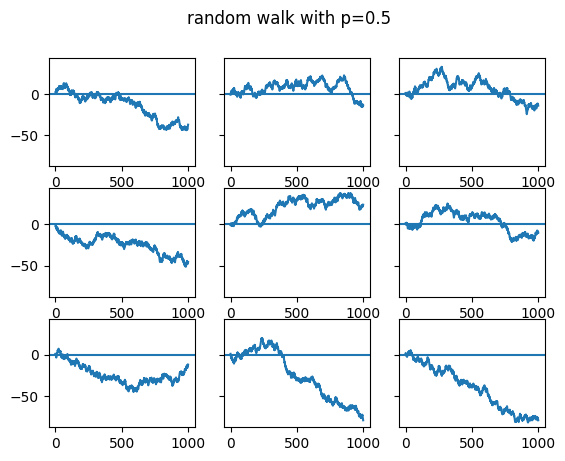

In [6]:
RANDOM_WALK_VIG = -1.1
def plot_random_walk(p, n=1000):
    fig, axs = plt.subplots(3,3, sharey='all')
    plt.suptitle(f"random walk with p={p}")
    for x in range(3):
        for y in range(3):
            win_or_lose = (np.random.rand(n) < p).astype("float")
            win_or_lose[win_or_lose==0] = RANDOM_WALK_VIG
            random_walk = np.cumsum(win_or_lose)
            axs[x,y].plot(random_walk)
            axs[x,y].axhline(0)
    

plot_random_walk(.5)


These are 1000 bets at 50% win rate and -110 vig. A couple of times, the bettor finishes with more money than they started with. But usually, they end up massively down at the end of the season.

Here's the same thing with a 54.1% win rate, like one of the pro pick sellers I discuss later on.

In [ ]:
plot_random_walk(.541)

2/9 lost money after 1000 bets. 5/9 were at zero profit after several hundred bets. Imagine buying hundreds of picks, making hundreds of bets, and being back at zero. (That's not even factoring in the cost of the picks.)

And here's someone who is right 60% of the time. Success is pretty boring. You can sort of see them breaking the surly bonds of earth's gravity and heading to the stars. They're all steadily gaining +1 unit per 10 bets.

In [ ]:
plot_random_walk(.6)

How about right at the break even point with the vig?

In [ ]:
plot_random_walk(.524)

### The Axe Forgets, The Tree Remembers

If you look at the random walks for p=.524, you could assign stories to all of those graphs. Some of them "got off to a hot start", then hit a rough patch. One of them "killed it" from the get-go.  Pretty much all of them had long winning and losing streaks a times. If you've heard of technical analysis, do you see any technical analysis "signals" in these graphs? 

If the 9 graphs were stock prices, which one would you consider the best investment? 

They're equally bad investments. All have the same expected value moving forwards, which is zero, because they're winning just enough to pay the vig, but not make profits.

The previous results are meaningless and have no bearing on whether the next step will be up or down. Every step is essentially a new random walk. The coin doesn't remember what has happened in the past. We do.

This is what's known in math as a Martingale, named after a "betting system" that was popular in France hundreds of years ago. The basic idea behind all these betting systems is to "chase" losses by betting more when you're losing.

Hopefully it's obvious that these chase systems are crazy, though formally proving it led to a lot of interesting math. 


### The Doctrine of Chances
TODO: discuss history of martindale, de moivre, etc.

### The Gambler's Ruin

If each bet you make has a negative expected value, you can't fix that by betting MORE. People do these chase systems on paper and end up taking million dollar bets to try to get out of a million dollar hole. "If I keep doubling down, eventually I'll win it all back." Maybe if you have infinite capital and unlimited time. Otherwise the Gambler's Ruin [16] is certain. The market can stay liquid longer than you can stay irrational.

There are many paradoxical things that happen on random walks, a lot of bad neighborhoods you might find yourself in. The longer you random walk, the higher the chances you end up in a bad part of town.

So maybe the fact that your chances of ruin go up the longer you Kelly bet should not be all that surprising. There are a whole host of surprising results around randomness but I'll save those for another time.

### Partial Kelly Betting

Remember, to make this work, the player has to have an advantage over the house, know the exact size of the advantage, and consistently bet the right amounts. 

Kelly Betting is the optimal way to maximize profits, but what about lower risk? Here's what happens when we Kelly bet 2% of our bankroll.

In [ ]:
BET_SIZE = .02
BETS = 1000

results = simulate_bankroll()
simulation_report(results)

In [ ]:
sum((results > 5) & (results < 100)) / RUNS

We didn't go broke in 100,000 simulations. Not bad. Mean rate of return on 1000 bets is 4.6x, and the median is 3.7x. So most of the time, it is a nice return on investment.

We still lost money 2.6% of the time, though. Being conservative, betting a lot of games at positive expected value, and betting the right way greatly increase the chances of success, but nothing can eliminate the possibility of failure.

>Failure is always an option.

If you've still got room on your back, maybe get that one tattooed, too.

Imagine doing 1000 bets at 56% win percentage and a conservative bet size, and still losing money. Wild, isn't it? 

### Betting a constant amount
You wouldn't have that problem with betting a constant amount, right? Say you have a bankroll of $1000 and you bet to win $20 on each game. 1000 games, 56 win %.

In [9]:
def constant_ev():
    games = 1000
    bankroll = 1000
    win_rate = .56
    wins = win_rate * games
    losses = (1 - win_rate) * games
    bet_size = 20
    vig = 1.1

    constant_amt = bankroll + (wins * bet_size) - (losses * bet_size * vig)

    print(f"expected: {constant_amt}")
    return constant_amt


def actual_simulation(sims=100000, games=1000, init_bankroll=1000, skill=.56, bet_size=20, vig=1.1):
    outcomes = []
    for sim in range(sims):
        bankroll=init_bankroll
        ## this code is inefficient, but I want to make it clear there's no 'funny business'
        for game in range(games):
            if rng.random() < skill:
                # we won! =)
                bankroll += bet_size
            else:
                bankroll -= (bet_size * vig)
        outcomes.append(bankroll)
    return outcomes
        
ev = constant_ev()

outcomes = pd.Series(actual_simulation())
print(f"min: {outcomes.min()}, max: {outcomes.max()}")

expected: 2520.000000000002
min: -252.0, max: 5586.0
hit expected value 100000


It only hits the exact expected value about 2.6% of the time. It's within 5% of the EV about 13% of the time.

In [15]:
100 * sum(round(outcomes) == round(ev)) / len(outcomes)

2.561

In [20]:
100 * sum((round(.95*ev) < round(outcomes)) & ( round(outcomes) < round(1.05*ev))) / len(outcomes)

12.952

<Axes: >

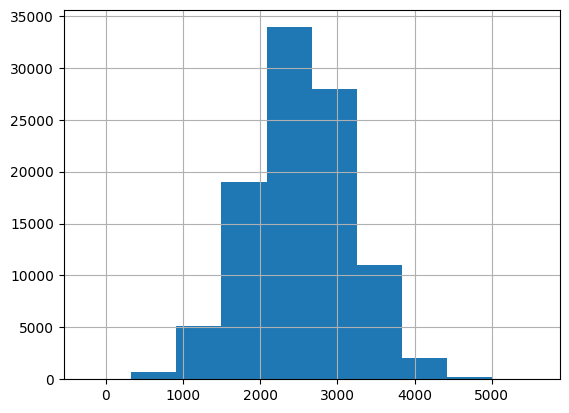

In [16]:
outcomes.hist()

This expected value calculation doesn't have any randomness in it. It's just a simple algebra problem. According to EV, we'll end up with $2520 at the end of the season, for a profit of $1520.

But you can't take the randomness out of the real world. In 100,000 simulations of this scenario, on very rare occasions, you end up losing all your money and more.

Nobody should take a bet with negative expected value. If you do that, a philosopher or economist will throw a copy of _Hans Brinker and the Silver Skates_ at your head, and yell, "that's irrational!"

But it's open to interpretation whether taking a bunch of positive expected value bets is rational. You could still lose money in aggregate. Our life isn't the average of all possible outcomes. We only get one.

### Caveats
NBA games don't happen one by one. There are usually several games starting at the same time. You can't adjust the bet size after every bet. So you'd have to bet the same amount on the entire batch of games, not adjust the amount bet on the 2nd game based on whether the 1st one won or lost.

## What are pick sellers really selling?

We still don't know what is a reasonable winning percentage for a human. People can't see the future so there has to be a practical limit, even if there's no theoretical limit. 

What if we were trying to figure out how high humans can jump? It might be possible to work out the maximum force human muscles can create and so on. But I would probably just find some of the best jumpers in the world and see what they can do. They're probably pretty close to the actual limit, whatever that is.

There's no end to people hawking picks. Amateurs on social media. Betting sites offering their "best bets" of the day. Come on, they're not running a charity. If the sportsbook somehow knew what bets were more likely to win, which way would they want you betting? 

If you want a job done right, you call a professional. How do the people selling picks for money do?

### Vegas Insider

![vi](img/vegasinsider.png)

Vegas Insider is a site that sells picks from a large number of handicappers. Kudos to them for making records available, but their picks don't appear to be much better than guessing.

These are the 2024 NBA records of all handicappers on the site.

In [ ]:
from io import StringIO


VEGAS_INSIDER_DATA = """
Handicapper,Year,Wins,Losses,Avg Odds,Profit,net units,win percentage
Bill Marzano,2024,161,168,-111,-2861,-23.8,48.94%
Brian Edwards,2024,138,143,-110,-1891,-19.3,49.11%
Bruce Marshall,2024,287,249,-110,1244,13.1,53.54%
Chip Chirimbes,2024,173,145,-111,1208,13.5,54.40%
Daniel Dobish,2024,110,116,-108,-1596,-17.6,48.67%
Jonny Reno Jorcin,2024,46,35,-110,746,7.5,56.79%
Jorge Gonzalez,2024,129,150,107,-3195,-36,46.24%
Mark Franco,2024,81,89,-110,-1662,-16.9,47.65%
Micah Roberts,2024,187,188,-112,-2274,-19.8,49.87%
Nick Parsons,2024,84,87,-111,-1306,-11.7,49.12%
Paul Bovi,2024,76,70,-114,-360,-1,52.05%
Ray Monohan,2024,133,122,-111,-187,-1.2,52.16%
Stephen Nover,2024,154,136,-112,223,4.4,53.10%
Vince Akins,2024,189,153,-110,2056,20.7,55.26%
Zack Cimini,2024,43,49,-110,-1093,-10.9,46.74%
"""

vi_df = pd.read_csv(StringIO(VEGAS_INSIDER_DATA))

vi_df

if you took every single NBA bet offered on the site in 2024, you'd be down 99 units. In reality you wouldn't do that because you'd probably end up taking both sides of the same bet on occasion due to handicappers disagreeing.

But even if you just picked one guy to follow, only 5 out of 14 handicappers actually made money. Only one hit a winning percentage over 55% on high volume.

The average winning percentage on Vegas Insider is too low to make money, even on reduced juice.

In [ ]:
print(vi_df['Wins'].sum())
print(vi_df['Losses'].sum())

print(vi_df['net units'].sum())
print(vi_df['Profit'].sum())

print(vi_df['Wins'].sum()/(vi_df['Wins'].sum() + vi_df['Losses'].sum()))


Also note the average odds taken. Except for two, they are all taking bets with an average vig greater than or equal to -110, which makes the records even worse. That may be due to them taking the money lines in close games. They don't have historical information on the individual picks, but I saw several recent examples of that in their free picks.

### Sportscapping

Another pick site seems to have slightly better cappers, though they charge a lot more for their picks: https://www.sportscapping.com/top-nba-all-trends.html

The top individual on that site has gone 2,828-2,390 with an average odds of -108. That's legit:

In [ ]:
win_loss_report(2828, 2390, vig=1.08)

[TODO: fix win_loss_report, the actual units part is confusing.]

Give the man his flowers. This is the first solid proof I've found that people can actually beat Vegas over a long period of time.

The winning percentage is very low, but that's partially due to taking bets at an average of -108. Notice how just going from -110 to -108 on the vig leads to 48 more units of profit. 

"Reduced juice" for basketball is -106. Going from -110 to -106 adds almost 100 units in wins. See why I've been hammering this vig stuff?


In [ ]:
win_loss_report(2828, 2390, vig=1.06)

247 units over 16 years of handicapping is +15 units a year, which isn't a lot.

He charges $35 a pick. Let's say we bought every single one of them. That would cost us $182,630. That's $739 per unit won. So we'd need to risk (1.1 * 739) = $813 on every one of his 5,218 picks just to cover the *cost of the picks themselves*. Anything less than that and we would be losing money.

The cost of the picks is basically another vig you have to overcome to make profits. If we're betting $100, then the pick cost is $35 and the vig is $10. So it's basically like taking every bet at -145. you're guaranteed to lose money if you do that. If we're betting $1000, then the pick cost is still $35 but the vig is $100. So it's like taking the bet at -113.5 instead of -110. Which is awfully hard to beat at a 54.1% winning percentage.

There's also a huge labor cost to placing 5,200 bets over a 16 year period. Imagine having to make bets every day of the NBA season for 16 years.

In [ ]:
print(2828+2390)
print((2828+2390)/16)
print(247/16)
print(813/247)

total_pick_cost = (2828 + 2390) * 35

print(total_pick_cost)

print(total_pick_cost /247)
print(1.1 * total_pick_cost /247)

### Backtesting, counterfactuals and survivorship bias

There's an obvious problem with taking someone's 15 year record and calculating possible profits off it.

Nobody knew this guy was going to go 2828-2390 over the next 15 years back when he started in 2009. "We could have made __ if we had done __" is a counterfactual. If you could send a note back in time to yourself in 2009, it would probably say "buy bitcoin" or something, not "buy the picks of this guy who will win 54% of his bets over the next 15 years".

The Sportscapping site doesn't seem to have any handicappers with a win percentage below 52.4%. Do you think that's because they've never had a handicapper with a long term losing record? 

It seems more likely to me that Vegas Insider is just more honest about it. This is classic survivorship bias: https://en.wikipedia.org/wiki/Survivorship_bias

What if we picked the wrong handicapper in 2009? There were a lot of other guys on that site back then:

https://web.archive.org/web/20090306055251/http://sportscapping.com/handicappers.html

How would you have known that this was "the" guy to follow? 

The final problem here is that we'd need to know the win rate in order to do Kelly betting. If we thought the picks would win at a 56% rate instead o a 54% rate, we could be in trouble.

## Philosophical Interlude: Bros Need Cool Stories

People selling picks always write a little story to go with them justifying their pick. They give a paragraph saying "Dallas hasn't been playing well on Tuesday nights when it's a full moon" or whatever. Seems like that's what dudes are really paying for.

I love these stories as a micro-genre of speculative fiction. Not because they're well written, but because they have to find something to say to go with hundreds of picks. A lot of it is stuff like "Pacers are 9-3 ATS in their last 12 games following a ATS loss." 

Do you think the coach is going, "we lost against the spread last night, so even though we won that game, we gotta pull out all the stops tonight! Gentlemen, think of the gamblers!"

It's really a combination of bad sportswriting and astrology. People don't go to psychics because psychics can see the future. They go for a coherent story about the future. "Truth is a luxury; fiction a necessity." 

Handicappers these days tend towards a bit more realistic-sounding analysis rather than statistical fallacies. Stuff like "I think they'll be tired after a long road trip." Or "the vibes have seemed wrong with this team." Or "this team is bad on defense when ___ doesn't play". 

It leads to a slightly better literary product. As an NBA fan, the analysis isn't all that deep, but I can read some of them and go, "that's reasonable". Most NBA analysis isn't all that deep in general, and they all promote and talk about gambling now, so it's kinda just like a mediocre NBA podcast. 

But if these cool bro stories don't seem to lead to the picks winning more, so what's the point? The only thing a customer should care about is the winning percentage of the handicapper, not their literary talents.

I say "dudes" deliberately. The whole thing is very dude-centric. Over 70% of sports gamblers are men: https://www.statista.com/statistics/1105283/sport-gambling-interest-gender/ . Almost all the handicappers and podcasters that push gambling are men. The language they use to sell the picks is very, shall we say, male coded.

Some recent examples:

> "Experience the thrill of winning with confidence with the help of razor-sharp predictions. We're your secret weapon for CRUSHING THE ODDS!" [12]

> "Sean Higgs has been crushing 'The Man' since the early 90s..." [13]

Some colorful ones from 2009.

> "CRUSH YOUR MAN on the weekends with The Widow's 3-Day Weekend Warrior Package! " [9]

> "Beat your man all week long with every single play released from The Widow for 7 days!" [9]

> "It's time for a new NBA season and Rob is ready to dominate the odds makers all season long." [10]

> "Take your book to the slaughterhouse on New Year's Day with World Champion Handicapper Jeff Alexander as he continues his Rock Solid 34-19 NCAAF Sides Run (64%) with his Ohio State/Oregon 5* Wiseguy Rose Bowl MONSTER (ABC), his LSU/Penn State 4* Major Capital One Bowl BOMB (ABC), and his Cincinnati/Florida 4* Major Sugar Bowl BOMB (FOX)! " [11]


I have a lot of books, dude. Which one should I take with you to the slaughterhouse? Is Upton Sinclair's _The Jungle_ too obvious? Why are we going to the slaughterhouse on New Year's Day, anyway? Is that an Irish thing?

### Timberwolves you used to know
Time for me to get on my middle aged man soapbox for a minute about you kids these days.  Betting is now a Thing For Guys To Talk About. Guys used to make things. Now they make bets. Instead of lore about nature and the world, men now trade gambling lore. Instead of stories about the migrations of birds, the names of the ancestors, and the creation of the Universe, it's stories about how Jimmy G will always ruin your parlay.

There's so much vocabulary and quasi-technical stuff to learn. How a teaser works. What a "stay away" team is. "Laying the points". Who's on a "hot streak". What "Vegas is trying to tell us". Who you shouldn't bet on in cold weather. Taking scalps. "Chasing steam". Great, now I have something I can say in both a sportsbook and a [Phish](https://phish.in/2013-12-28/steam) parking lot!

Perhaps it feels like secret knowledge, like absorbing all this lore is how you get skilled at betting. But hopefully by now you understand it's not actually a skill for most guys. What are they learning from all this lore?

It might be called an anti-skill. What's another situation where the more information you have, the more lingo you know, the worse you are at it? 

Based on the "fade the public" experiment, someone betting the popular money would always be on the other side. That means they would go 145-180 (44%) against the spread on basketball so far this year. That's 19 games below .500!

I don't know how a strategy like "pick the team with the mascot that would win in a fight" would do, but I would guess better than 44%. Like I said a while back, it would be a talent to consistently lose 56% of the time instead of 50% of the time.  But if "betting the conventional wisdom" and "betting with the majority" are the same thing, then following the conventional wisdom gives you anti-skills, because people who bet with the majority lose bad. 

Specifically, I think the anti-skill is in rationalizing continuing to bet with the majority, even though it does worse than flipping a coin. I realize I'm creating a bit of a strawman here, because I'm sure some percent of the time, the pick sellers and the guys posting 5 paragraph essays on reddit about why each of their bets lost *are* choosing the less popular side.

The intermingling of money and emotions adds an extra element to gambling addiction -- I don't think anyone starts doing hard drugs because they think it will make them rich.


### Explanatory Fictions and Imaginary Relationships
A parasocial relationship with a guy selling picks or talking about gambling on a podcast causes guys to want to form social relationships around gambling. They're Gambling Guys now. Which leads to an endless parade of dudes complaining about their parlays online, and, I would wager, annoying the heck out of their significant others. "It's a whole lifestyle, Sherri! Of course I had to get my tips frosted! I'm a Gambling Guy now!"

It's all imaginary. An imaginary relationship with a betting guru in the form of a "hot tip". An imaginary relationship with the sporting event or player in the form of a bet. An imaginary relationship with reality itself in the form of the rationalization about why the "hot tip" didn't win. An imaginary relationship between winning and skill. 

Being a sports fan is already ridiculous enough.

Dudes do the storytelling in reverse when a bet loses. A whole paragraph about "I thought that Durant was gonna blah blah blah but instead blah blah". This is silly. A rational bettor wouldn't try to learn too much from any one data point, much less post a whole essay about it to the internet. This is known as overfitting. It's bad!

### Robot, Teach Thyself
I couldn't stand reading too many explanations of losses, but the thinking seems to be that if you just, like, learn a rule from every bet you take, eventually you will have this system of rules that will never steer you wrong.

I got interested in AI well ahead of the curve, in the late 90's. So learning by creating a bunch of rules is fascinating to me because that's kind of how AI started out, and that's definitely not where it is now. 

Proto-AI researchers created what are called Expert Systems [7]. Some mushrooms are poisonous, and some are not. There are books that will help you classify mushrooms you find. If it's brown and smaller than this size and has this type of cap and that type of spore print, it's edible.  Otherwise, it's not. You can put all these rules into a decision tree. If brown, take the left branch, if not brown, take the right. Eventually, after a series of decisions, you get to either "eat it" or "don't eat it".

Dude Betting Stories are similar. "Never throw the Chargers in a money line parlay, unless they're going against a team with an interim coach when it's raining." It's a reasonable way for trying to model the thinking of an expert, something a non-expert could use to approximate their talents on Sunday afternoons. But it's a limited technique in practice. It's weird to see the folk psychology version of this old AI thing that doesn't work well.

There are better techniques for classification now. But they can't really tell you a story the way a decision tree can. "Explainable AI" is a big thing now because deep learning is like an oracle that Just Knows Stuff, and it can't really tell you why.

### Learning the Right Amount
In case I haven't said it enough times, nobody cares about your terrible bets, especially when you took the more obvious side. No, LeFraud didn't betray you by failing to cover by one point. More likely the line was one point too generous on the side of the underdog because most people bet the Lakers.

Based on all I've seen, someone who can actually do this is still only winning 55ish percent of the time. Which means that 45% of the time they're going to lose even if they pick the side of the bet that was more likely to win. Maybe it's a really strong bet and for some reason they know it has a 66% chance of winning. Should they be surprised if it loses? No. That's a totally normal thing to happen one time in three.

Imagine I took the simple "fade the public" strategy and sold those picks. (of course, there was no way to know this strategy would work at the beginning of the year). I could certainly write a little story for each one, maybe in the style of Raymond Carver. "Will You Please Take The Over, Please?"

The story doesn't make the bet more likely to be true, though, right? A factual story would be the same for every bet, and not very interesting: "there is slightly more value on this side of the bet." 

Bros need stories, though.


### Timing is everything
It seems like people who sell picks have to get them out well before the start of the game. If you accept the "fade the squares" premise, then you would probably want to take your bets at the last possible minute because that's when the line should be most favorable to you. So they have to look for different bets.

Lines move, so to get the exact same bet as the pick seller, you would need to place your picks at the same time they do.  Say they recommend betting on Denver when the line is DEN -3.5. A bunch of people take the bet, so the sportsbook moves the line to DEN -4.5. Denver wins by 4 points. It was a win for the pick seller and a loss for people who bet the same side.

It could cut the other way as well. The pick seller recommends Orlando +7. A bunch of bets come in on the other side, it closes at ORL +9. The team loses by 8.

But if you believe in the efficiency of the market, the price for the winning side should get more expensive from the opening line to the closing line. Which means that if you don't take the pick seller's picks right away, you could get a worse number.

## Efficiency of Markets

The efficient market hypothesis says that markets are, given enough time and competition, able to establish the correct price for a commodity. In this case, we could think of it as the price of a money line bet. If CLE -300 is a good value, people will rationally want to take it, driving the price up. If it is a bad value, people will rationally want to take the other side. These rational actors will collectively push the price towards the best possible estimate that humans can do.

Under this theory, the final lines should be more accurate than the opening lines. Are they? Indeed they are.

In [ ]:
open_errors = ftp['open_with_line'].to_numpy()
close_errors = ftp['with_line'].to_numpy()

These errors can be positive or negative. We're interested in how big they are, not which direction they point. Mean Squared Error is the standard way to compare two predictions. Lower error is better.

In [ ]:
(open_errors ** 2).mean()

In [ ]:
(close_errors ** 2).mean()

In [ ]:
open_errors.shape

So the closing lines are better, 186.37 "things" to 193.2 "things" on the open line.

Red dots are the opening line. Blue dots are the closing line. if the markets are efficient, the distance from the horizontal 0 line should go down.  The x axis are games in the order played.

In [ ]:
plt.scatter(range(len(open_errors)), open_errors, color='r')
plt.scatter(range(len(close_errors)), close_errors, color='b')
plt.axhline(y=0)

### Decision Boundaries

This is a classic dataset in the field of machine learning. From data about the shape of the petals and sepals of a flower, can you predict which of 3 species of iris it belongs to?

![courtesy scikit-learn.org](img/iris_svc.png)

[TODO: all this shit about "classes" and "labels" won't make sense to the average joe]

A lot of machine learning boils down to: 

1) turn the data that we know the labels for (in this case, which species of iris it is) into numerical vectors.
2) do some math "tricks" so that all the datapoints for the same class end up close together in space and can be easily separated from each other
3) use more tricks to establish decision boundaries -- the borders between classes. Each class will end up with its own regions. nearly all the points in the dataset will be in the region corresponding to its actual class.

If we're given new data and asked to predict which class it's in, do step 2 to the new data, then figure out what class its location in space corresponds to, and predict that class.

### Illusions, Michael
I'm not being colloquial when I describe step 2 as a "trick". With the SVM algorithm, it's literally called "the kernel trick". Never go trick or treating at a mathematician's house. They might just hand you a linear algebra textbook. And those things are heavy. Bound to slow you down the rest of the night.

The big thing to understand is that establishing good decision boundaries is really, really important. Imagine we're classifying mushrooms. If we classify a poisonous mushroom as non poisonous because the decision boundary is wrong, that would be bad.

The closer a datapoint is to the decision boundary, the more important it is to get it right. If you're going mushroom picking, you'd want to pay close attention to mushrooms that look very similar, but one is poisonous and one isn't, because those are the ones you'd worry about the most. If we were testing mushroom pickers, those would be the ones we'd ask them about. Anyone can classify the obvious ones.

These are the ones that would be closest to the decision boundary in a machine learning algorithm. When establishing the decision boundary, the most logical way to do that is to draw it so there are an equal number of misclassifications in each region. The decision boundaries should be unbiased. We can't really say the algorithm made the "best guess" if they're biased. We're not using the data we've been given optimally.

With all this windup, you're probably hoping I have something good to show you. And I do. Because the point spread is also a sort of decision boundary. [TODO: not sure this analogy works]

Because the same thing should be true of the point spreads. Underdogs and favorites should win equal amounts of close games against the spread.

Let's look at what happens in games where the final score is within 3 points of the line.

In [ ]:
close_games = ftp[ftp.with_line.abs() < 3]
close_games.fave_dog.value_counts()

The underdog wins close games against the line 57.4% of the time this season.

What about games where the line was off by less than a point? The underdogs are 19-5. 79% win percentage. It's a small sample, but that difference is significant.

In [ ]:
ftp[ftp.with_line.abs() < 1].fave_dog.value_counts()

In [78]:
super_tight = ftp[ftp.with_line.abs() < 1]

In [ ]:
super_tight.fade.value_counts()

In [ ]:
pd.crosstab(super_tight['fave_dog'].to_numpy(), super_tight['fade'].to_numpy())

In [81]:
tight_appearances = super_tight.away_names.value_counts() + super_tight.home_names.value_counts()

In [ ]:
super_tight.away_names.value_counts() 

In [ ]:
super_tight

In [ ]:
tight_appearances.sort_values(ascending=False)

OK, so there's strong evidence of a bias towards underdogs. They win 52% of the time overall. The closer the game is vs. the spread, the more frequently they win.

There's also a possible bias against away teams.

In [ ]:
ftp.winner_ats.value_counts()

Away teams beat the spread 52% of the time. Like we saw with underdogs, that's enough for the sportsbook to make a little easy money if most of the bets are on the home team, but not enough to allow arbitrage by always picking the underdog.


What about close games?

In [ ]:
close_games.winner_ats.value_counts()

56% win percentage for away teams in close games. Not statistically significant, but very :thinking_face_emoji: given all we've seen now.

Some of this is probably coincidence, but it points to both the lines being non-ideal, and the marketplace not doing very well at correcting these mistakes.

### Adam Smith, Handicapper

On 123 games, the closing line was better than the opening line (the blue dot is closer to ideal than the red). On 110 games, the opening line was better (the red dot is closer to ideal than the blue.)

In [ ]:
sum(abs(open_errors) > abs(close_errors))

In [ ]:
sum(abs(close_errors) > abs(open_errors))

In [ ]:
sum(abs(open_errors) == abs(close_errors))

Imagine we can bet on whether the closing line will beat the opening line. How do we feel about 123-110-97 as a handicapper record?

In [311]:
win_loss_report( 123, 110)

record:   123 - 110
full vig units: 2.0
reduced juice units: 6.4
win pct: 52.79%, expected wins: 116.5 , excess: 6.5, profit %: 0.86
z test: 0.851658316704544, std: 7.632168761236874 , p: 0.19720188109739745


so less than 53% of the time, the market moves the bet in the right direction. You could lose a lot of money taking capitalism in a 4 team teaser. Nephew Doug would never recommend it.

that's not really a glowing endorsement of the free market, is it? If the sports betting market were a handicapper on one of these pick selling sites, would you buy its picks? 
>"Bet with 4* Handicapper Adam Smith (123-110 +2u) and get an invisible hand up on your man! Take your book to the charnel house with these picks!"

Probably not.

### What would "perfect" lines look like?
I decided the closing lines were better than the opening lines based on Mean Squared Error. The opening lines were at 193 and the closing lines were at 188. What would it take for the lines to be at zero error?

It's rare to see NBA lines that are bigger than +15/-15 points. there have only been 3 so far this season:

In [ ]:
ftp[(ftp.away_spread > 15) | (ftp.away_spread < -15)]

In the first game, Washington vs. OKC, the line was OKC -17.5. They won by 18. Wild. That's as good as they can do (they put the line on the half-point to avoid ties. If the game ties versus the spread, it's called a "push" and everybody gets their money back. They really, really don't like giving money back.)

IN the second game, the line was BOS -16.5. They won by 54 points. Should the line have been BOS -53.5 instead of -16.5?

While there were only 3 lines that large, there were 93 games where the final score differential was bigger than 15. That's 28% of all games this season!

In [ ]:
sum(abs(ftp.score_diff) > 15) / len(ftp)

The line was off by over 15 points compared to the final result 28% of the time for the opening lines and 27% of the time for the closing lines.

In [ ]:
print(sum(abs(open_errors) > 15) / len(ftp))  
print(sum(abs(close_errors) > 15) / len(ftp))


Imagine checking the NBA odds, and a quarter of them were over -15/+15?

The problem is that we're working with a sample size of one game. Boston isn't going to beat Toronto by 54 points every time. Earlier this season, Boston only beat them by 3 points in overtime.

So the fact that the lines are way off a lot of the time shouldn't be surprising. The line is a single number that should represent the mid-way point of a distribution of possible outcomes. We only get to see one result, so it's hard to say how perfect the lines could be.

There's a lot more analysis of the lines I could do, but I'll save that for future work.

## Can an amateur do it?

### The Odd Case of Oddspedia
I found a site called oddspedia, where people can make fake bets: https://oddspedia.com/

There are people on that site have made thousands of fake bets. Nearly everyone is terrible at it, yet they persist. There are small prizes for being the best bettor one month, but otherwise I don't really understand the incentives. But if there are people who can consistently beat the lines, oddspedia seemed the best place to find them.

And hey, there are people on the site who can really do it. This is the current top user:

https://oddspedia.com/u/s00n/stats

6535-4984 all time, which is a staggering volume. And they're not taking safe bets - the average odds taken is 2.25, which is +125 in freedom units. They're taking longer odds and winning. with 10K picks, if it's legit, I would hope it's an algorithmic strategy.

The actual bets taken are fascinating. Most of them are on soccer. I don't know where the lines are coming from, because a lot of them are incredibly obscure. 

The Ugandan Police soccer team (seems like a weird team to bet against, but OK). Something called an "Asian Handicap" bet on Clube de Albergaria, a Portuguese women's soccer team with 10,000 likes on Facebook. A bet on Ermis Shimatariou, a Greek 2nd division basketball team that plays in what looks like a small high school gym. A bet on a team called "MC Oran", who I guarantee you has a SoundCloud.

I'm skeptical anyone could really take these bets in the real world. I couldn't find them being offered anywhere.

I was curious enough to make an account and it looks like the lines they use are substantially different from the sportsbooks, especially on non-standard bets like the 1st quarter score. The vig is also unrealistically low, like [-105/+103]. It's a lot easier to look smart when you're paying a vig like -101 instead of -110.

So there might be something to oddspedia, but it's not realistic. It's notable with all these advantages to the player that most of the users of the site still lose, massively, over the long term. Better that than real money. But it makes me rethink my stance that there's no potential downside to making fake bets. At some point don't you realize this isn't your thing?

### reddit
Reddit has its own community of amateur handicappers on the /r/sportsbook forum.

Here's [one example](https://www.reddit.com/r/sportsbook/comments/1i0u91i/pick_of_the_day_11425_tuesday/)

![betting systems](img/reddit1.png)

[The Mavs lost, real bad](https://plaintextsports.com/nba/2025-01-14/den-dal). The game was basically over from the start. But you should judge people on process, rather than outcomes. Especially binary outcomes. Rather, let's count the fallacies.

First, showing "recent form" -- the bettor's pattern of wins and losses -- is somehow significant. There's no reason why it should be. I think it's part of the bias towards thinking people are *streaky* -- if a handicapper has won their last 4 in a row, they're more likely to win the next bet, and vice versa. That's just not how things work.

Let's say a person has good skill weeks and bad skill weeks. Or some other period of time. Some periods, their picks are just good enough to beat the vig at 52.4%, other periods their picks are excellent at 57.4%


In [ ]:
RANDOM_WALK_VIG = -1.1


def generate_alternating(skill_levels, determinate=False, period_length=100, periods=10):
    assert len(skill_levels) == 2, "must have 2 skill levels."

    base_data = []
    ticks_up = []
    ticks_down = []

    prev_skill = skill_levels[0]
    for x in range(periods):
        # every `period_length` days, the skill level can change.
        if determinate:
            # take the other one. not the nicest way to do it.
            skill_copy = skill_levels.copy()
            skill_copy.remove(prev_skill)
            current_skill = skill_copy[0]
        else:
            current_skill = np.random.choice(skill_levels)

        # mark every time we switch skill_levels
        if current_skill != prev_skill:
            if current_skill > prev_skill:
                ticks_up.append(x * period_length)
            elif current_skill < prev_skill:
                ticks_down.append(x * period_length)
        
        win_or_lose = (np.random.rand(period_length) < current_skill).astype("float")
        win_or_lose[win_or_lose==0] = RANDOM_WALK_VIG
        base_data.extend(win_or_lose)

        prev_skill = current_skill

    return [np.cumsum(base_data), ticks_up, ticks_down]

def plot_random_walk2(random_walks, show_partitions=False, ticks_up=None, ticks_down=None):
    fig, axs = plt.subplots(3,3, sharey='all')

    walk_counter = 0
    first_axis = None
    for x in range(3):
        for y in range(3):
            axs[x,y].set_ylim(bottom=-50, top=75)
            axs[x,y].set_xticks([])
            axs[x,y].plot(random_walks[walk_counter][0])
            axs[x,y].axhline(0)
            if show_partitions:
                axs[x,y].vlines(random_walks[walk_counter][1], 0,50, 'g')
                axs[x,y].vlines(random_walks[walk_counter][2], 0, 50, 'r')   
            walk_counter += 1
    
data = []
skill_levels = [.50, .574]
for x in range(9):
    walk = generate_alternating(skill_levels, determinate=True)
    data.append(walk)

plot_random_walk2(data)

Can you tell that the skill level is alternating every 100 bets between good and bad?

Let's draw lines every time the skill level changes. A red line means the lower skill level is now in effect, and green means the higher skill level.

In [ ]:
plot_random_walk2(data, True)

Once you see the lines, maybe you notice the patterns, but did you notice them before?

here are random walks at the equivalent probability:

In [ ]:
plot_random_walk(.549)

#TODO make this match the scale of the other one.

I don't think you could really tell the difference. It's even less obvious if the period we switch between is 10 games instead of 100 games. This is simulating toggling between a 50% and 58% win percentage every 10 games for 1,000 games.

In [ ]:
data = []
skill_levels = [.50, .58]
for x in range(9):
    walk = generate_alternating(skill_levels, determinate=True, period_length=10, periods=100)
    data.append(walk)
plot_random_walk2(data)


Maybe there are small details that a random walk enthusiast could notice, but the entire 1,000 game random walks just look like other random walks. There are long trends that last for hundreds of games and multiple switches between probabilities. These longer trends aren't caused by anything, they just emerge when you take a bunch of random data and turn it into a random walk.

There's no reason to act as though hot streaks exist if natural variation explains the data just as well. We still get "hot streak" like behavior even though half the time we're essentially making the pick with a coin flip.

This is where the paradox of mediocrity comes in again. A true *cold streak* would be getting 50% wins for a long period of time, not losing 8 out of 10, or some smaller pattern. But there's no way to conclude you're at 50% winning instead of 57% winning in just a few games.

Of course, this scenario is ludicrous. If someone is switching between "good at betting" and "bad at betting" it's not happening exactly every 100 games, right? If we made the switches at random times instead of a regular schedule, it would be even harder to tell.

If you really don't know exactly when these changes happen, then the best estimate is going to be the global average, not estimating if you're in the *good bettor* or *bad bettor* phase. 

So the last 10 results doesn't matter, only the global win rate.

Now, I am sort of assuming the player's edge over the house stays constant -- they can always find lines that are a little off throughout the season. Maybe that's not a safe assumption -- perhaps the lines are closer to the truth in the middle of the season than they are at the beginning. But I think that's something you could only notice way after the fact.


### Variable Units
Another problem is the idea of betting variable units on different bets. the rules of that reddit sub are that you recommend wagering a certain number of "units" on each bet, from 1-5 units. The custom appears to be betting in whole units. The idea is to bet higher stakes on games where you feel more confident, and lower stakes when you feel less confident. 

Is that actually useful? That's an additional decision that the bettor could end up getting wrong. That will add more random variation to the outcomes. 

Essentially this turns the problem from making a binary decision of "the line is too high" vs. "the line is too low" into estimating the exact probability of the prediction coming true, and estimating where the dividing lines should be between 0/1/2/3/4/5 unit bets. Seems like a lot to ask of one little brain.

A machine learning system could probably do it. A binary classifier trained to decide a question like "is this a good bet or not" is usually going to output a raw number between 0 and 1, and then you round up or down to get the yes/no. 

One could use the raw result -- it is a sort of confidence level. But some scaling would have to be done to get it to a 1..5. A machine learning system that returns a value of ".79" isn't really saying it will win 79% of the time. Machines can't see the future, either. A ".79" is probably more likely to win than a ".62", but that's another thing to estimate. With a machine learning system, we could go back and train it on old data from previous seasons to get that tuning right (or at least, not making things worse.)

Humans can't do that, and there's a huge emotional aspect, too. If your best bets usually win 60% of the time then you should always bet the same amount, regardless of whether you've been on a losing streak or a winning streak or you cat died or whatever. It's just another way for emotions to muck up the process.

It's certainly possible that people could learn to scale their bets correctly. But it would have to be deliberate practice -- seeing whether variable betting size actually helps over hundreds of bets. I think you'd want to track your emotions as well, and control for that if possible in the analysis.

The thing is, it's hard to beat the fact the best estimate is to take a global average, not slice and dice it. Once again, to the thought lab.

### Do Variable Units Make More Money?

I'm gonna make some assumptions. The great thing about code is you can change it and see for yourself, if you think my assumptions are bad.

I'm doing 3 classes of bets, A, B and F. Let's assume that a bettor can produce picks of different quality levels. And all categories have a positive expected value.

`thresholds` is the average win rate for each class of bet.
`units_map` controls number of units bet for each class.
`frequencies` controls how frequent each grade is. I figure A's are rarer than B's which are rarer than F's.

I will then score the bets weighted by class versus betting the same amount on each bet (the sum of grade_frequencies * units_map).

Guess how often the weighted system beats the unweighted system.

In [75]:
### generate a list of A's, B's, and F's.
### then show that they will have different records.

thresholds = {
    'A': .60,
    'B': .57,
    'F': .54
}

grade_frequencies = {
    'A': .2,
    'B': .3,
    'F': .5
}

units_map = {
    'A': 3,
    'B': 2,
    'F': 1
}

def create_df(num_bets, freq=grade_frequencies, thresh=thresholds):
    results = []
    grades = rng.choice(["A", "B", "F"], size=num_bets, p=list(freq.values()))
    for x in range(num_bets):
        grade = grades[x]
        if rng.random() < thresh[grade]:
            results.append("W")
        else:
            results.append("L")

    graded_df = pd.DataFrame(dict(grades=grades, result=results))

    return graded_df

def score_bets_with_grade(record, units=units_map):
    units_won = 0
    for grade in units.keys():
        net_wins = record[grade]['W'] - (1.1 * record[grade]['L'])
        units_won += (net_wins * units[grade])

    return units_won


def get_unit_multiplier(base_df):
    # average number of units bet
    # need to use record.grades

    ###FIXME? shouldn't this be using the actual generated data to get the
    ### average unit multiplier?
#    return (pd.Series(units_map) * pd.Series(grade_frequencies)).sum()
    actual_frequencies = base_df.grades.value_counts() / len(base_df.grades)
    return (pd.Series(units_map) * actual_frequencies).sum()
    
    #sum(df.grades.value_counts() * pd.Series(units_map)) / len(df.grades)



def score_bets_normally(base_df, unit_multiplier=None):
    record = base_df.groupby("grades").value_counts()
    if 'W' in record:
        total_wins = record[:,'W'].sum()
    else:
        total_wins = 0
    if 'L' in record:
        total_losses = record[:,'L'].sum()
    else:
        total_losses = 0

    units_won = total_wins - (1.1 * total_losses)

    if unit_multiplier is None:
        unit_multiplier = get_unit_multiplier(base_df) #FIXME: this should take units_map as an argument.

    return unit_multiplier * units_won
    

def perturb(df):
    ### gonna randomly change some of the grades, to simulate imperfect grading.
    pass

def graded_vs_ungraded(perturb=False):
    grade_wins = 0
    grade_losses = 0
    diffs = []

    for x in range(1000):
        base_df = create_df(100)
        if perturb:
            base_df = perturb(base_df)

        record = base_df.groupby("grades").value_counts()
        with_grade = score_bets_with_grade(record)
        normally = score_bets_normally(base_df)
        if with_grade > normally:
            grade_wins += 1
        else:
            grade_losses += 1
        diffs.append(with_grade - normally)

    print(f"wins: {grade_wins}, losses: {grade_losses}")
    print(f"mean diff: { np.mean(diffs) }")

graded_vs_ungraded()

wins: 804, losses: 196
mean diff: 17.168499999999998


In [59]:
df = create_df(100)

In [64]:
sum(df.grades.value_counts() * pd.Series(units_map)) / len(df.grades)

1.59

There's a reason why the grading isn't working very well. It's the scale. The convention on reddit and another betting forum I looked at is to post in whole units, usually 1 or 2. 

The three probabilities of success are .54, .57 and .60. Based on rates of return, that would correspond to a 1/3/5 mapping.

In [320]:
fifty_four = .54 - (1.1 * .46)

print(1) 
print((.57 - (1.1 * .43))/fifty_four) 
print((.6 - (1.1 * .4))/fifty_four) 

1
2.8529411764705928
4.7058823529411855


In [21]:
units_map = {
    'A': 5,
    'B': 3,
    'F': 1
}

graded_vs_ungraded()

wins: 681, losses: 319
mean diff: 7.7004800000000015


In [77]:
def do_some_grades(n):
    good = []
    bad = []
    normal = []

    for x in range(n):
        bets = create_df(1000)
        bad_grading = bets.copy()

        # Simulate imperfect grading
        # I'm not sure what a reasonable number of each class is to change.
        # seems like it should match proportion of actual sample.
        ### select indexes to change
        idx_f = np.random.choice(bets.index, 150)
        idx_b = np.random.choice(bets.index, 100)
        idx_a = np.random.choice(bets.index, 50)
        bad_grading.loc[idx_f, 'grades'] = 'F'
        bad_grading.loc[idx_b, 'grades'] = 'B'
        bad_grading.loc[idx_a, 'grades'] = 'A'

        bad_score = score_bets_with_grade(bad_grading.groupby("grades").value_counts())
        bad.append(bad_score)

        normal_score = score_bets_normally(bets)
        normal.append(normal_score)

        good_score = score_bets_with_grade(bets.groupby("grades").value_counts())
        good.append(good_score)
    return pd.DataFrame({'good': good, 'bad': bad, 'normal': normal})


scores = do_some_grades(500)

In [78]:
sum(scores.normal>scores.good)

3

In [80]:
sum(scores.bad> scores.normal)

493

In [36]:
score_bets_with_grade(bad_grading.groupby("grades").value_counts())

np.float64(88.19999999999997)

In [37]:
score_bets_with_grade(p_original.groupby("grades").value_counts())

np.float64(114.6)

In [38]:
score_bets_normally(p_original.groupby("grades").value_counts())

np.float64(86.87999999999997)


This is assuming a person really can tell if the bet is coming from the "54%" part of their brain, the "57%" part, or the "60%" part.

I just don't think anyone's like that. If even a small number of the labels is wrong, the weighted betting is gonna do worse.

Informally, "take this bet" vs "don't take this bet" is one bit of information. A good bettor can only get that right 57% of the time. 

If there are three grades of bet, they now need to estimate 2 bits of information. ("00" - don't take, "01" - F, "10" - B, "11" - A). How often are they going to get both bits right?  If you estimate a bet as a "B" when it's really an "A", then you've lost out on a unit of gains, almost the same as if you estimated a bet as an "F" that should have been a "don't take".


### Why can't us?
Back in November, I needed a bit of a distraction, for some odd reason. So I started betting on paper without really knowing a lot of this stuff. I figured I'd do it till I got bored or proved I couldn't do it (which admittedly isn't the best experimental design). 

I did pretty well, finishing 158-121 by the end of the year. I didn't beat the "fade the public" strategy on number of units won, which was a little disappointing. Dr Frankenstein should probably be able to beat Frankenstein's Monster on NBA trivia night. Does that dude even know who Trevelin Queen is?

Maybe I'll talk more about it and share my janky spreadsheet of virtual bets if this piece gets any interest.  I suspect my theoretical gains aren't more interesting than other peoples' actual losses, though.

# Conclusions
I was skeptical that anybody could make money on betting sports. Hopefully I've shown that's impossible, or close to impossible, for most types of bets. It's not due to lack of skill on the bettor's part. They're just sucker bets. Don't be a sucker.

If you:
* bet reduced vig
* bet a rational amount (don't chase losses, etc.)
* are genuinely playing to win rather than for thrills
* have enough emotional control
* have a way to generate positive expected value bets
* understand why ALL the above are requirements

then I think it can be done as a game of skill. For the vast majority of people, it's not going to be. Too many "ifs". I think doing it on paper is a necessary step.

### Once more, for the people in the back
Anyone considering betting real money should seriously consider the risk of addiction on top of the risk of losing money. Do the things you bring into your life have positive expected value or not?

Betting on paper offers a way to get some of the thrills of betting without losing anything, and could become a gateway to learning some statistics and data science. A crippling data addiction might be more satisfying and lucrative in the long run.

### Epilogue/Apologia

I am aware that _Hans Brinker_ is actually an American story, not a true Dutch book. Write more famous books, Dutch people.

If you found this piece useful, please consider never telling me one of your dumb betting stories. Yes, I know the Celtics have "this one kid" who's a "wicked fackin shootah". That's not a reason to take the over on the Payton Pritchard prop bets every night, my man.

There's no such thing as luck, just sampling error.

# References

[1] https://en.wikipedia.org/wiki/Dutch_book_theorems   
[1] https://www.oddsshark.com/nfl/super-bowl/how-much-is-bet     
[2] https://www.sportsbookreview.com/betting-odds/nba-basketball/    
[3] https://www.vegasinsider.com/parlay-calculator/    
[4] https://www.vegasinsider.com/picks/expert-records/   
[5] https://www.iwmf.org/reporting/ghost-stories-idi-amins-torture-chambers/    
     
[7] https://en.wikipedia.org/wiki/Expert_system     
[8] https://en.wikipedia.org/wiki/Impossibility_of_a_gambling_system      
[9] https://web.archive.org/web/20090216002309/http://sportscapping.com/handicappers.html?capper/279/Black%20Widow    
[10] https://web.archive.org/web/20081224010345/http://sportscapping.com/handicappers.html?capper/294/Rob%20Vinciletti  
[11] https://web.archive.org/web/20091231234929/http://sportscapping.com/handicappers.html?capper/271/Jeff%20Alexander   
[12] https://www.sportscapping.com/sal-michaels.html         
[13] https://experts.winnersandwhiners.com/cappers/37     
[14] https://en.wikipedia.org/wiki/Poisson_binomial_distribution      
[15] https://www.betfirm.com/nba-point-spread-money-line-conversion-chart/      
[16] https://mathworld.wolfram.com/GamblersRuin.html         

# Further Reading

https://archive.org/details/fractalschaospow0000schr   

